1. Problem Understanding

a) Defining problem statement

A house value is simply more than location and square footage. Like the features that make up a
person, an educated party would want to know all aspects that give a house its value. For
example, you want to sell a house and you don’t know the price which you may expect — it can’t
be too low or too high. To find house price you usually try to find similar properties in your
neighborhood and based on gathered data you will try to assess your house price.

b) Need of the study/project

From the understanding, This data set describes about the houses that were already sold or estimated for sale in the past two years 2014 and 2015, which help to predict the pricing of a property that he/she wants to sell based on the comparision to the house details that were given in the data set.
For Instance - What was the price at which the house was sold
The year when the house was built
Was it recently renovated(Or not renovated)
Number of bathrooms, bedrooms that the house consists of, its overall square feet which also includes number of floors wether the it has a view to the waterfron etc.
Location where the house is present.
So the main objectibve is to analyse all the features in the dataset and build a model which will eventually predicts the best or accurate price for an property.

c) Understanding business/social opportunity

When any person wants to sell their property the first challenge/question that they will face is how much should the property be quoted as per the market.
So in order to help the customers to understand their value of their properties we are going to build a model which will help predict the accurate pricing of an house.
This model will definitely help the customers from losing their money by selling their property for a low price or by quoting the property for high prices which again will lead to a challenge of potentially no buyers.

2. Data Report

b) Visual inspection of data (rows, columns, descriptive details) 

In [1918]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster
import warnings
warnings.filterwarnings('ignore')

In [1919]:
df = pd.read_excel("/Users/happyfamily/Desktop/Capstone/innercity.xlsx")

In [1920]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3.876101e+09,20150427T000000,600000.0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,1966.0,0.0,98034.0,47.7228,-122.183,2020.0,8660.0,0.0,12490.0
1,3.145600e+09,20150317T000000,190000.0,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1948.0,0.0,98118.0,47.5546,-122.274,1660.0,4100.0,0.0,3771.0
2,7.129303e+09,20140820T000000,735000.0,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0.0,98118.0,47.5188,-122.256,2620.0,2433.0,0.0,5455.0
3,7.338220e+09,20141010T000000,257000.0,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0.0,98002.0,47.3363,-122.213,2030.0,3794.0,0.0,5461.0
4,7.950301e+09,20150218T000000,450000.0,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1924.0,0.0,98118.0,47.5663,-122.285,1120.0,5100.0,0.0,5710.0


In [1921]:
df.tail()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
21608,2.036006e+08,20150310T000000,685530.0,4.0,2.50,3130.0,60467.0,2.0,0.0,0.0,3.0,9.0,3130.0,0.0,1996.0,0.0,98014.0,47.6618,-121.962,2780.0,44224.0,1.0,63597.0
21609,6.250493e+08,20140521T000000,535000.0,2.0,1.00,1030.0,4841.0,1.0,0.0,0.0,3.0,7.0,920.0,110.0,1939.0,0.0,98103.0,47.6860,-122.341,1530.0,4944.0,0.0,5871.0
21610,4.240690e+08,20140905T000000,998000.0,3.0,3.75,3710.0,34412.0,2.0,0.0,0.0,3.0,10.0,2910.0,800.0,1978.0,0.0,98075.0,47.5888,-122.04,2390.0,34412.0,1.0,38122.0
21611,7.258200e+09,20150206T000000,262000.0,4.0,2.50,1560.0,7800.0,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1997.0,0.0,98168.0,47.5140,-122.316,1160.0,7800.0,0.0,9360.0
21612,8.805900e+09,20141229T000000,1150000.0,4.0,2.50,1940.0,4875.0,2.0,0.0,0.0,4.0,9.0,1940.0,0.0,1925.0,0.0,98112.0,47.6427,-122.304,1790.0,4875.0,1.0,6815.0


In [1922]:
#Helps to display all the columns in the dataset
pd.options.display.max_columns = None

In [1923]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3.876101e+09,20150427T000000,600000.0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,1966.0,0.0,98034.0,47.7228,-122.183,2020.0,8660.0,0.0,12490.0
1,3.145600e+09,20150317T000000,190000.0,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1948.0,0.0,98118.0,47.5546,-122.274,1660.0,4100.0,0.0,3771.0
2,7.129303e+09,20140820T000000,735000.0,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0.0,98118.0,47.5188,-122.256,2620.0,2433.0,0.0,5455.0
3,7.338220e+09,20141010T000000,257000.0,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0.0,98002.0,47.3363,-122.213,2030.0,3794.0,0.0,5461.0
4,7.950301e+09,20150218T000000,450000.0,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1924.0,0.0,98118.0,47.5663,-122.285,1120.0,5100.0,0.0,5710.0


In [1924]:
df.tail()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
21608,2.036006e+08,20150310T000000,685530.0,4.0,2.50,3130.0,60467.0,2.0,0.0,0.0,3.0,9.0,3130.0,0.0,1996.0,0.0,98014.0,47.6618,-121.962,2780.0,44224.0,1.0,63597.0
21609,6.250493e+08,20140521T000000,535000.0,2.0,1.00,1030.0,4841.0,1.0,0.0,0.0,3.0,7.0,920.0,110.0,1939.0,0.0,98103.0,47.6860,-122.341,1530.0,4944.0,0.0,5871.0
21610,4.240690e+08,20140905T000000,998000.0,3.0,3.75,3710.0,34412.0,2.0,0.0,0.0,3.0,10.0,2910.0,800.0,1978.0,0.0,98075.0,47.5888,-122.04,2390.0,34412.0,1.0,38122.0
21611,7.258200e+09,20150206T000000,262000.0,4.0,2.50,1560.0,7800.0,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1997.0,0.0,98168.0,47.5140,-122.316,1160.0,7800.0,0.0,9360.0
21612,8.805900e+09,20141229T000000,1150000.0,4.0,2.50,1940.0,4875.0,2.0,0.0,0.0,4.0,9.0,1940.0,0.0,1925.0,0.0,98112.0,47.6427,-122.304,1790.0,4875.0,1.0,6815.0


In [1925]:
df.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
count,2.161300e+04,2.161300e+04,21505.000000,21505.000000,21596.000000,2.157100e+04,21556.000000,21612.000000,21612.000000,21612.000000,21613.000000,21613.000000,21613.000000,21447.000000,21584.000000,21584.000000
mean,4.580302e+09,5.401822e+05,3.371355,2.115171,2079.860761,1.510458e+04,0.234366,7.656857,1788.366556,291.522534,84.402258,98077.939805,47.560053,1987.065557,12766.543180,0.196720
std,2.876566e+09,3.673622e+05,0.930289,0.770248,918.496121,4.142362e+04,0.766438,1.175484,828.102535,442.580840,401.679240,53.505026,0.138564,685.519629,27286.987107,0.397528
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,1.000000,290.000000,0.000000,0.000000,98001.000000,47.155900,399.000000,651.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,0.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,47.471000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571800,1840.000000,7620.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,0.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000,47.678000,2360.000000,10087.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,6210.000000,871200.000000,1.000000


There are two different types of dataset are available object and float.
From the decribe section we can see the various ranges of values present in the dataset.
For instance the cplumn price has values in thousands and lakhs where as most of the columns are in decimals with values ranging from tens and hundreds.

c) Understanding of attributes (variable info, renaming if required)

In [1926]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  float64
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  float64
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  float64
 16  zipcode           21613 non-null  float6

In [1927]:
df.shape
#By default there were about 21613 rows and 23 columns in the data set

(21613, 23)

In [1928]:
type(df)

pandas.core.frame.DataFrame

3. Exploratory Data Analysis

In [1929]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3.876101e+09,20150427T000000,600000.0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,1966.0,0.0,98034.0,47.7228,-122.183,2020.0,8660.0,0.0,12490.0
1,3.145600e+09,20150317T000000,190000.0,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1948.0,0.0,98118.0,47.5546,-122.274,1660.0,4100.0,0.0,3771.0
2,7.129303e+09,20140820T000000,735000.0,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0.0,98118.0,47.5188,-122.256,2620.0,2433.0,0.0,5455.0
3,7.338220e+09,20141010T000000,257000.0,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0.0,98002.0,47.3363,-122.213,2030.0,3794.0,0.0,5461.0
4,7.950301e+09,20150218T000000,450000.0,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1924.0,0.0,98118.0,47.5663,-122.285,1120.0,5100.0,0.0,5710.0


In [1930]:
#dayhours is the next column which is been considered for analysis

In [1931]:
df['dayhours'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: dayhours
Non-Null Count  Dtype 
--------------  ----- 
21613 non-null  object
dtypes: object(1)
memory usage: 169.0+ KB


In [1932]:
df['dayhours'].unique()

array(['20150427T000000', '20150317T000000', '20140820T000000',
       '20141010T000000', '20150218T000000', '20140709T000000',
       '20140715T000000', '20140618T000000', '20140721T000000',
       '20141028T000000', '20140502T000000', '20150123T000000',
       '20141029T000000', '20150311T000000', '20140822T000000',
       '20140522T000000', '20140819T000000', '20150428T000000',
       '20150212T000000', '20140909T000000', '20141125T000000',
       '20140818T000000', '20140719T000000', '20141230T000000',
       '20150112T000000', '20140829T000000', '20150501T000000',
       '20140811T000000', '20141103T000000', '20140620T000000',
       '20141203T000000', '20141030T000000', '20141208T000000',
       '20140903T000000', '20140610T000000', '20150422T000000',
       '20140625T000000', '20150222T000000', '20150113T000000',
       '20140923T000000', '20140624T000000', '20150128T000000',
       '20141014T000000', '20150316T000000', '20140912T000000',
       '20140606T000000', '20141017T0000

This column helps us predict the year when the house is sold
This also help us to find if there is seasonality in sales with the availability of month in the dayhours column.

In [1933]:
#df['dayhours'] = pd.to_datetime(df['dayhours'],dayfirst=True)
#to convert the dayhours format from Object data type to datetime format

In [1934]:
df['dayhours'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: dayhours
Non-Null Count  Dtype 
--------------  ----- 
21613 non-null  object
dtypes: object(1)
memory usage: 169.0+ KB


In [1935]:
df['dayhours'].value_counts()

20140623T000000    142
20140625T000000    131
20140626T000000    131
20140708T000000    127
20150427T000000    126
20150325T000000    123
20150414T000000    121
20150428T000000    121
20150422T000000    121
20140709T000000    121
20140624T000000    120
20150421T000000    119
20140826T000000    117
20141028T000000    117
20140520T000000    116
20140714T000000    116
20140701T000000    115
20150429T000000    114
20140820T000000    114
20140617T000000    113
20150408T000000    112
20140729T000000    112
20140528T000000    111
20140716T000000    111
20150423T000000    110
20140805T000000    110
20140825T000000    109
20150327T000000    109
20140811T000000    107
20140620T000000    107
20140723T000000    107
20140722T000000    105
20150326T000000    105
20140527T000000    104
20140603T000000    104
20140822T000000    103
20150402T000000    103
20140923T000000    103
20150424T000000    103
20150407T000000    102
20140725T000000    102
20140827T000000    102
20140715T000000    102
20150504T00

In [1936]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3.876101e+09,20150427T000000,600000.0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,1966.0,0.0,98034.0,47.7228,-122.183,2020.0,8660.0,0.0,12490.0
1,3.145600e+09,20150317T000000,190000.0,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1948.0,0.0,98118.0,47.5546,-122.274,1660.0,4100.0,0.0,3771.0
2,7.129303e+09,20140820T000000,735000.0,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0.0,98118.0,47.5188,-122.256,2620.0,2433.0,0.0,5455.0
3,7.338220e+09,20141010T000000,257000.0,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0.0,98002.0,47.3363,-122.213,2030.0,3794.0,0.0,5461.0
4,7.950301e+09,20150218T000000,450000.0,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1924.0,0.0,98118.0,47.5663,-122.285,1120.0,5100.0,0.0,5710.0


The below plot was designed from Tableau tool.
Here i have plotted the cid column which denotes as the notation of houses being sold along with the dayhours.
which tells us the number of properties being sold in month wise.


Graph for dayhours with cid plotted in the tableau tool

The sale of house in the year 2014 was relatively higher compared to that of 2015.
In month swise plotting we could see that some sort of seasonality was observed during the sales.
The sales in terms of month were at its peak during April and Month compared to that of other months in a year.
In terms of Quarterly sales Q2 sales was at its peak and Q4 sales were the lowest.

In [1937]:
#We can also plot the dayhours column with the targetted column price and find some insights

In terms of price the Avg cost seems to be consistent throughout the year but there is a slight increase during the month of April till July.
In terms of years the sum of price is high for 2014 compared to that of 2015, this could be because of the high number of sales in 2014.
But the average price amount for the properties in 2015 has slightly increased compared to that of 2014,
This could also be because of the inflation factor or because of increase in cost livings.
The Avg price amount for Q2 is high compared to other quarters in a year.

Graph for dayhours with Price plotted in the tableau tool

In [1938]:
#Analysing the target column which is price
df.describe()["price"]

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [1939]:
#Ideally price column cannot be of type float considering the fact that the large numbers will be present
#so converting the data type from float to int
df['price'] = df['price'].astype('int')

In [1940]:
df['price'].isnull().sum()

0

From the above description it is understood that
Minimum price value of an property is 75000
First Quantile(Q1) i.e. 25% of the values are between 321950
50% of the property value is 450000
And a max being 7700000 
Average price of an property is at 540182
There are no missing values in this column.

In [1941]:
#Trying to analyse the distribution of prices 
pd.options.display.max_rows = None
df['price'].value_counts().sort_index(ascending=False)

7700000      1
7060000      1
6890000      1
5570000      1
5350000      1
5300000      1
5110000      1
4670000      1
4500000      1
4490000      1
4210000      1
4000000      1
3850000      1
3800000      2
3710000      1
3650000      2
3640000      2
3600000      1
3570000      1
3420000      1
3400000      3
3350000      1
3300000      4
3280000      1
3200000      5
3170000      1
3120000      1
3100000      3
3080000      1
3070000      2
3000000      6
2980000      1
2950000      5
2920000      1
2900000      4
2890000      3
2880000      1
2850000      1
2800000      1
2750000      3
2730000      1
2720000      1
2700000      5
2680000      1
2650000      1
2640000      1
2630000      1
2600000      2
2580000      3
2570000      1
2560000      1
2550000      1
2540000      4
2530000      2
2510000      1
2500000      5
2490000      1
2480000      3
2470000      1
2460000      1
2450000      5
2420000      1
2410000      1
2400000      9
2390000      1
2380000      2
2370000   

In [1942]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 0.5)))
print("  1% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 1)))
print("  5% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 5)))
print(" 10% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 10)))
print(" 90% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 90)))
print(" 95% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 95)))
print(" 99% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 99.5)))

0.5% properties have a price lower than  133436.00
  1% properties have a price lower than  153500.36
  5% properties have a price lower than  210000.00
 10% properties have a price lower than  245000.00
 90% properties have a price lower than  887000.00
 95% properties have a price lower than  1160000.00
 99% properties have a price lower than  1968800.00
99.5% properties have a price lower than  2450000.00


We have analysed the distribution of prices across the properties
From my understanding the distribution of prices seems to be normal with a min property value is at 133436
To max being 7700000.00.
Even though the range is huge according to understanding of the data set the price amount can vary based on various factors.
Hence non of the values are being dropped considering the fact that only 0.5 of values are lower than 133436.00
and only 0.5% of price are above 2450000.00
This is competely based on the understanding of the data set.

In [1943]:
#room_bed

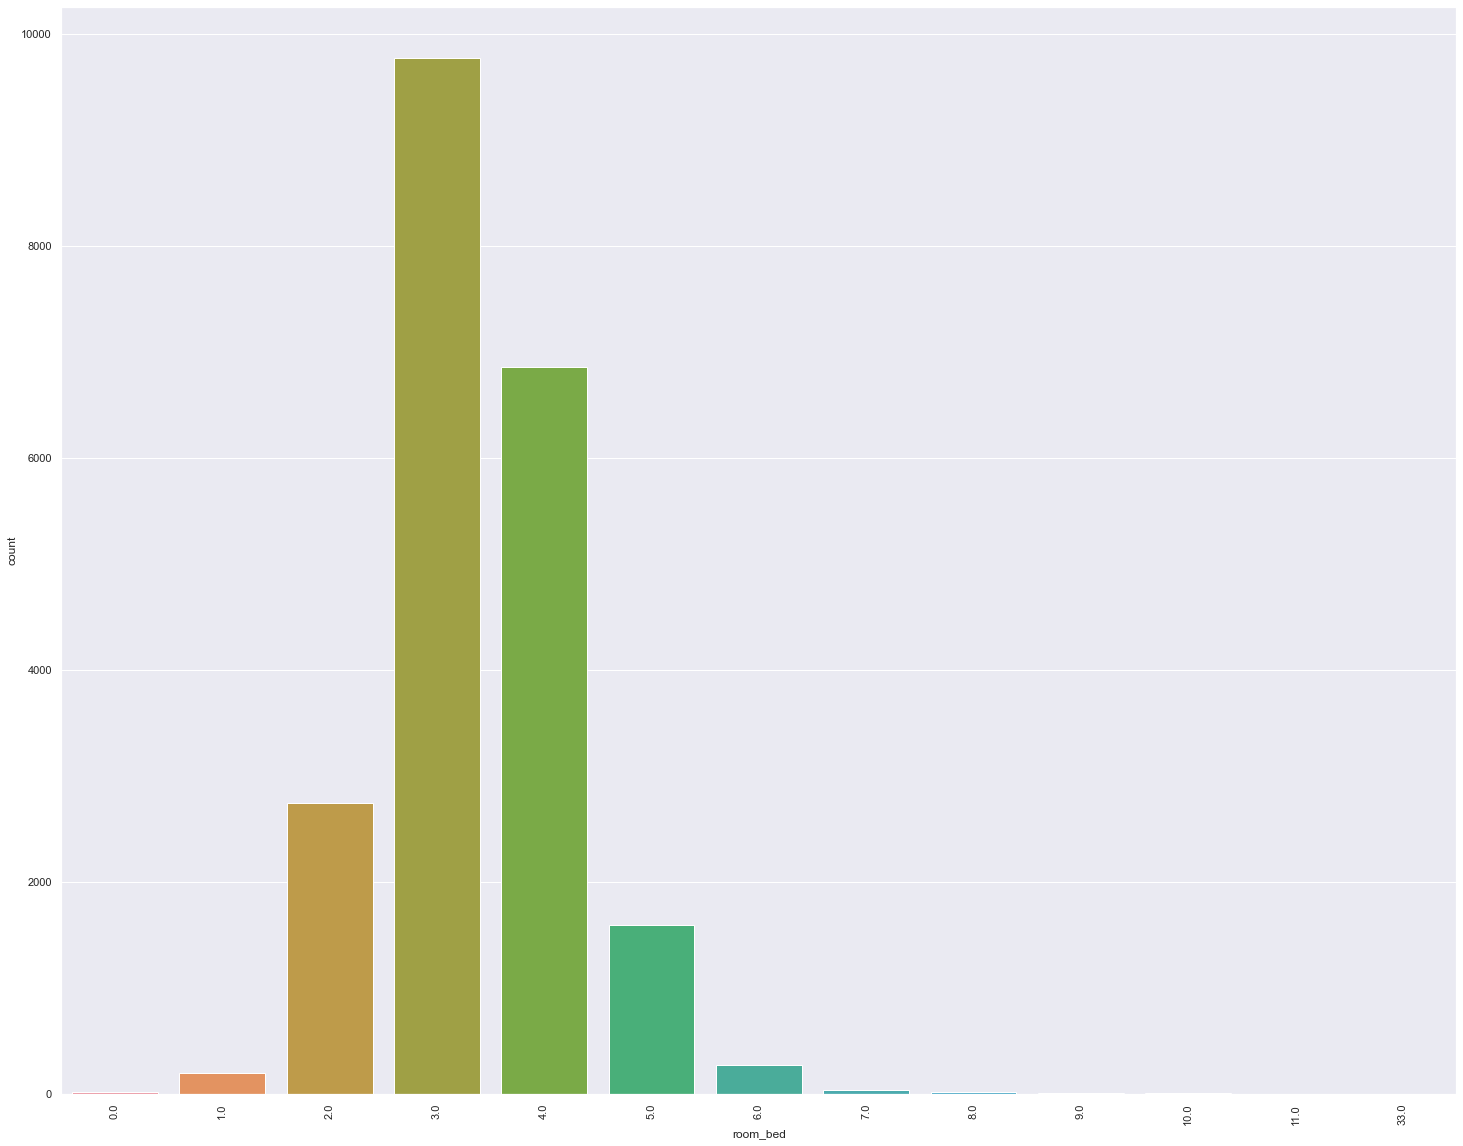

In [1944]:
plt.figure(figsize=(25,20))
sns.countplot(df['room_bed'])
plt.xticks(rotation=90);

In [1945]:
#Seems like from the plot most of properties have three bed rooms.
#The column room_bed can be right skewed this might look like a presence of outlier, but there might also be a chance that the size of property is much bigger as well.
#But since the data set says that the similar property size of neighborhood we need to consider availability of 33 bed_rroms as outlier and it has to be treated. 

<AxesSubplot:xlabel='room_bed', ylabel='price'>

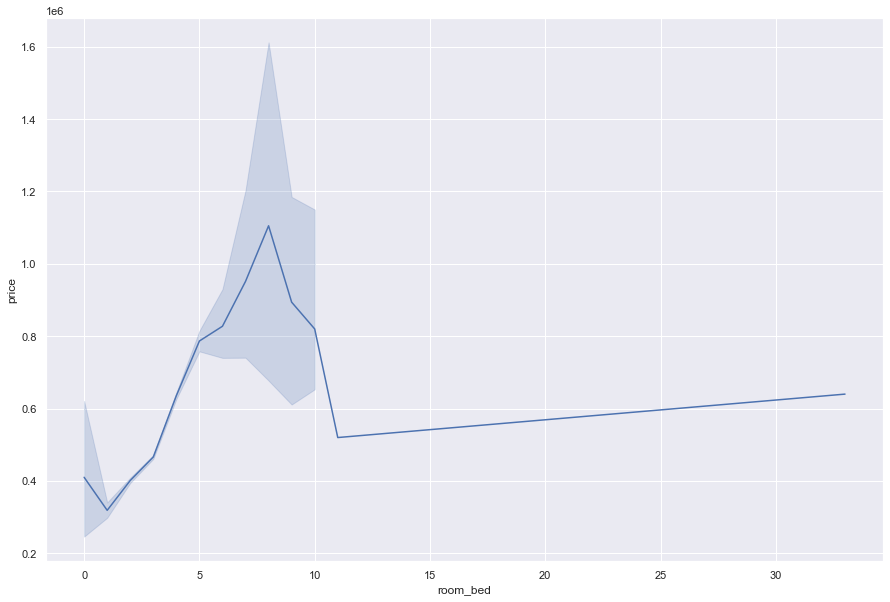

In [1946]:
#Compare room_bed column with the target column
plt.figure(figsize=(15,10))
sns.lineplot(data=df,x='room_bed',y='price')

In [1947]:
#Its quiet visible from the above plot that the price amount varies based on the availability of number of bedrooms

In [1948]:
df['room_bed'].value_counts()

3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

In [1949]:
df['room_bed'].unique()
#There are null values present in this dataset which will be treated seperately

array([ 4.,  2.,  3.,  1.,  5.,  6., nan,  7., 10.,  8.,  0.,  9., 33.,
       11.])

In [1950]:
#room_bath

<AxesSubplot:xlabel='room_bath', ylabel='count'>

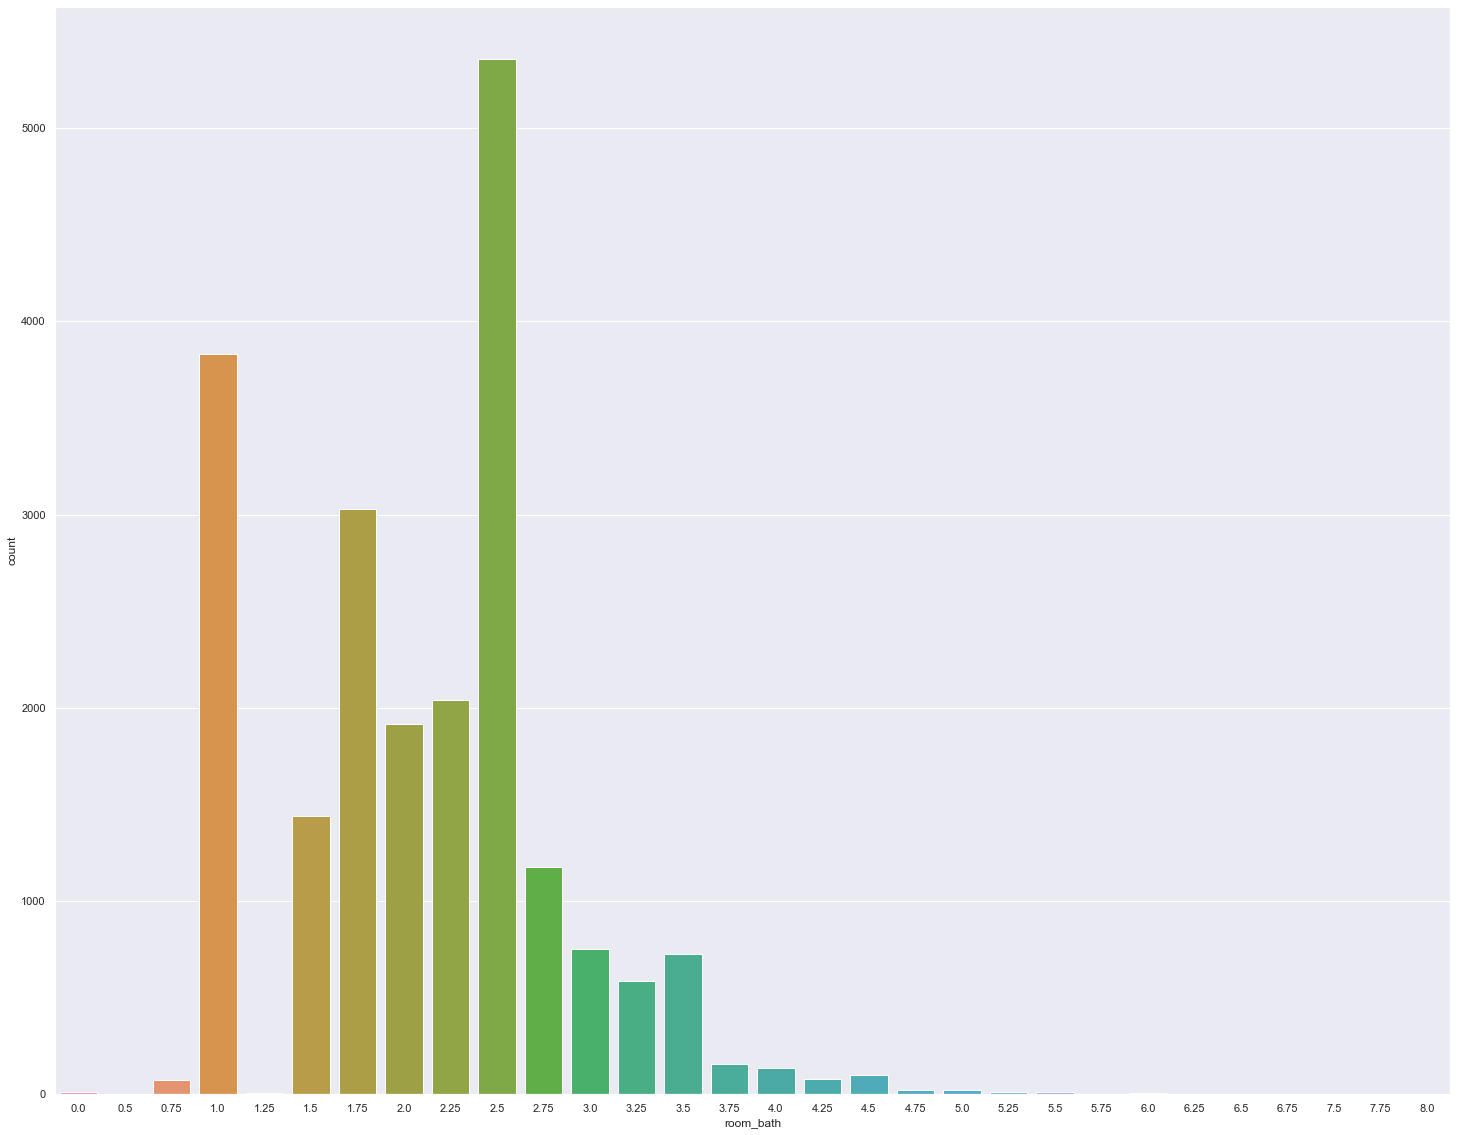

In [1951]:
plt.figure(figsize=(25,20))
sns.countplot(df['room_bath'])


Here in this column we can see the bath rooms were displayed as float data(.5,1.5).
Here the number of bathrooms vary from 0 to 8
There can be a possiblity of outliers in this column.

In [1952]:
df['room_bath'].value_counts(ascending=False)

2.50    5358
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.50       2
6.25       2
7.50       1
7.75       1
Name: room_bath, dtype: int64

In [1953]:
df['room_bath'].unique()
#There are presence of null values in this column

array([1.75, 1.  , 2.75, 2.5 , 1.5 , 3.5 , 2.  , 2.25, 3.  , 4.  , 3.25,
       3.75,  nan, 5.  , 0.75, 5.5 , 4.25, 4.5 , 4.75, 8.  , 6.75, 5.25,
       6.  , 0.  , 1.25, 5.75, 7.5 , 6.5 , 0.5 , 7.75, 6.25])

<AxesSubplot:xlabel='room_bath', ylabel='price'>

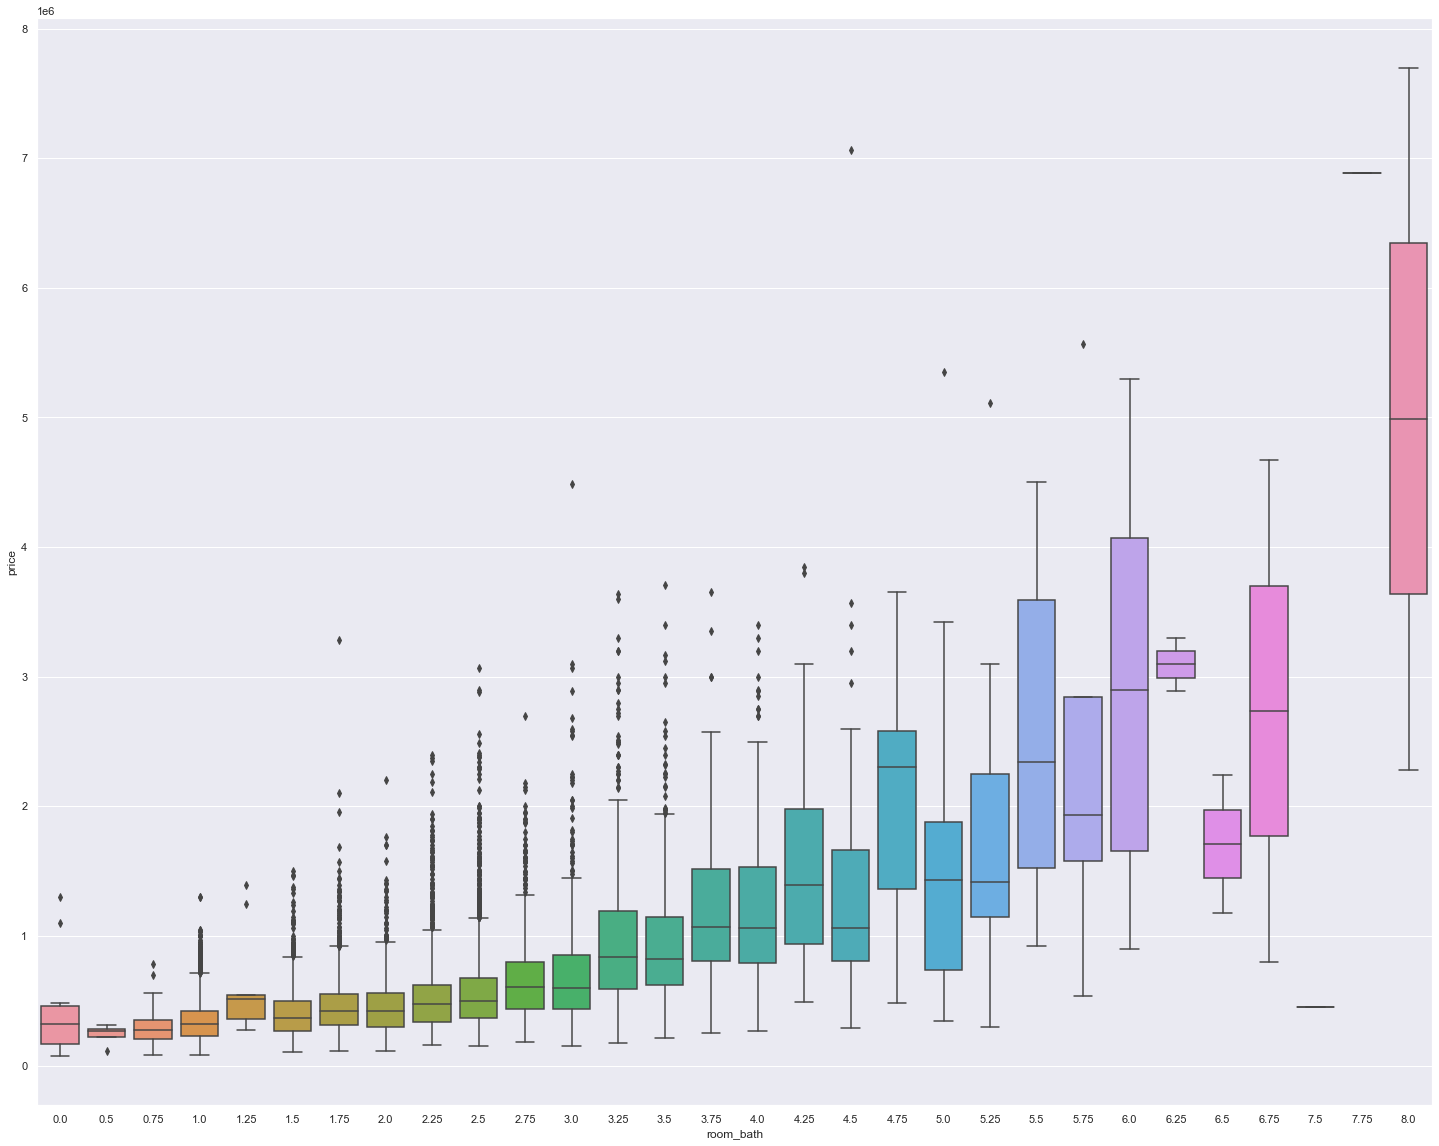

In [1954]:
#Analysisng the room_bath column with the target column as price
plt.figure(figsize=(25,20))
# plotting lineplot
sns.boxplot( df['room_bath'], df['price'])

From the above plot it is clearly visible that as the number of bathrooms increase the price amount also increases.
From the box plot for 'room_bath' column it is seen that outliers are visible in this feature.
Also there are null values present here as well.

<AxesSubplot:xlabel='room_bath'>

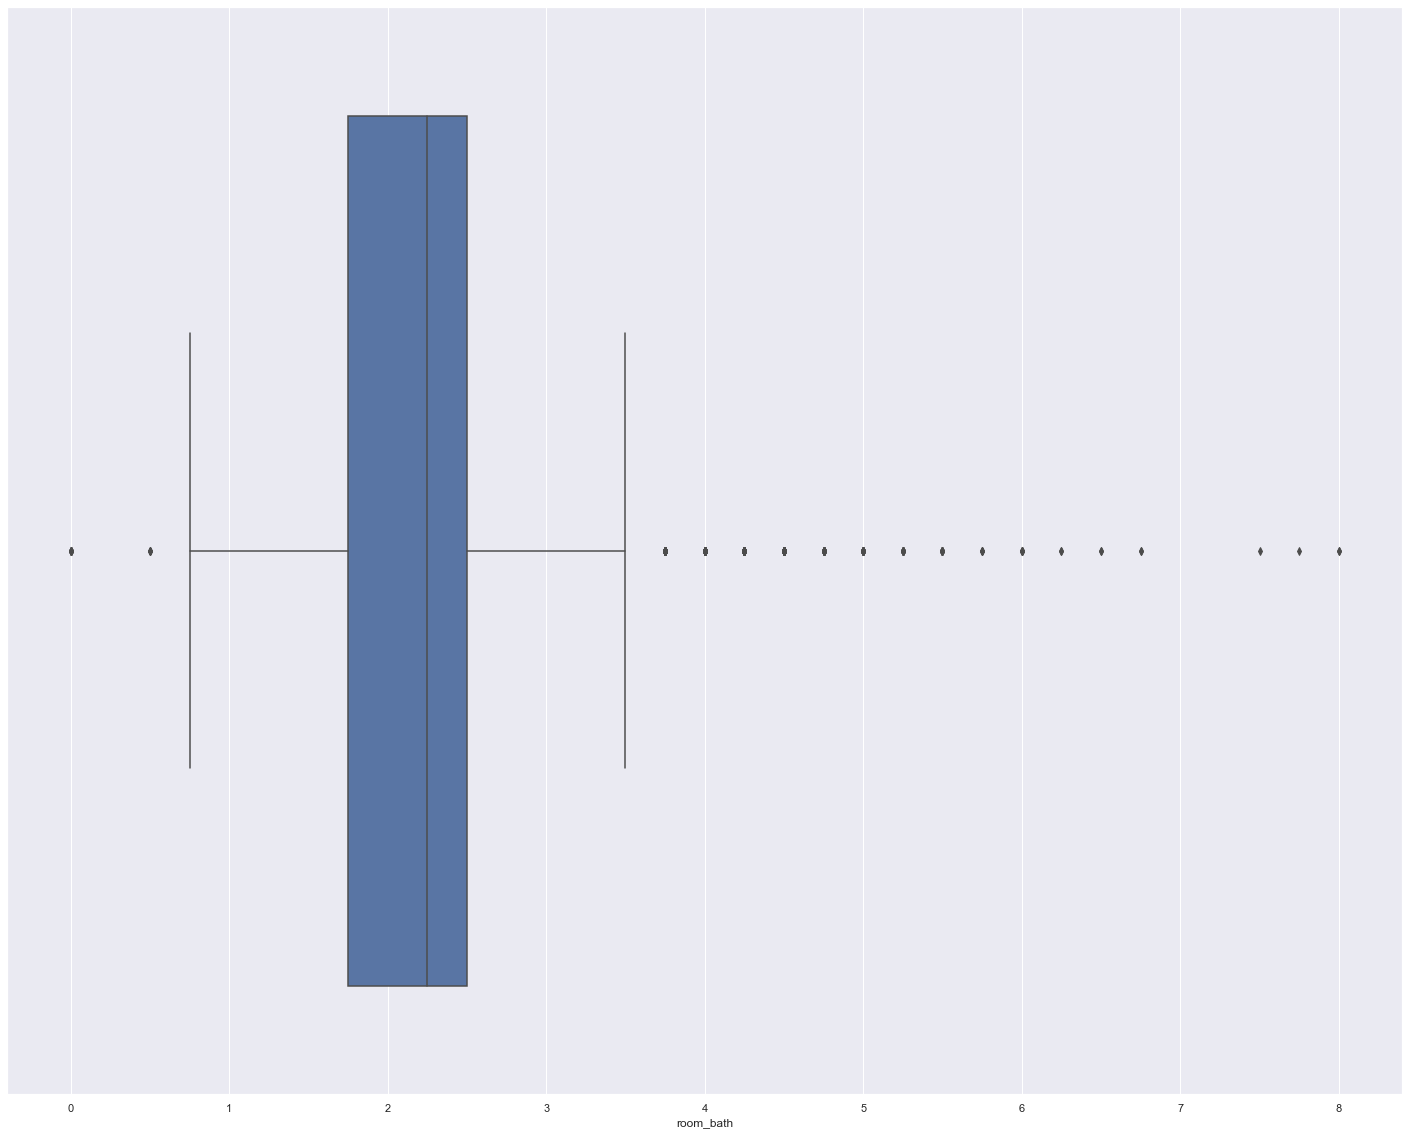

In [1955]:
plt.figure(figsize=(25,20))
sns.boxplot(df['room_bath'])

Analysing the column 'living_measure'

In [1956]:
df['living_measure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: living_measure
Non-Null Count  Dtype  
--------------  -----  
21596 non-null  float64
dtypes: float64(1)
memory usage: 169.0 KB


In [1957]:
df['living_measure'].value_counts()

1300.0     138
1400.0     134
1440.0     133
1010.0     129
1800.0     129
1660.0     129
1820.0     128
1720.0     125
1540.0     124
1480.0     124
1560.0     124
1320.0     122
1250.0     120
1580.0     119
1370.0     118
1900.0     117
1780.0     117
1650.0     117
1200.0     117
1460.0     116
1430.0     116
1680.0     116
2100.0     115
1740.0     115
1510.0     114
1830.0     114
1260.0     113
1340.0     113
1640.0     112
1470.0     112
1240.0     112
1610.0     112
1500.0     112
2120.0     111
1790.0     110
1960.0     110
1690.0     110
1670.0     109
1600.0     109
1530.0     109
1410.0     109
1700.0     108
1980.0     105
1590.0     104
2020.0     104
1760.0     104
2040.0     104
2000.0     103
1270.0     102
1520.0     102
1940.0     101
1840.0     101
2240.0     101
1570.0     100
1140.0     100
1280.0     100
1850.0     100
2060.0     100
1730.0     100
1620.0      99
1490.0      99
1770.0      98
1810.0      98
1150.0      98
1890.0      98
2080.0      98
1360.0    

In [1958]:
df['living_measure'].unique()

array([3050.,  670., 3040., ..., 1405., 1295., 2253.])

Insert the plot for 'living_measure' from tableau tool

Boxplot for feature 'living_measure'

<AxesSubplot:xlabel='living_measure'>

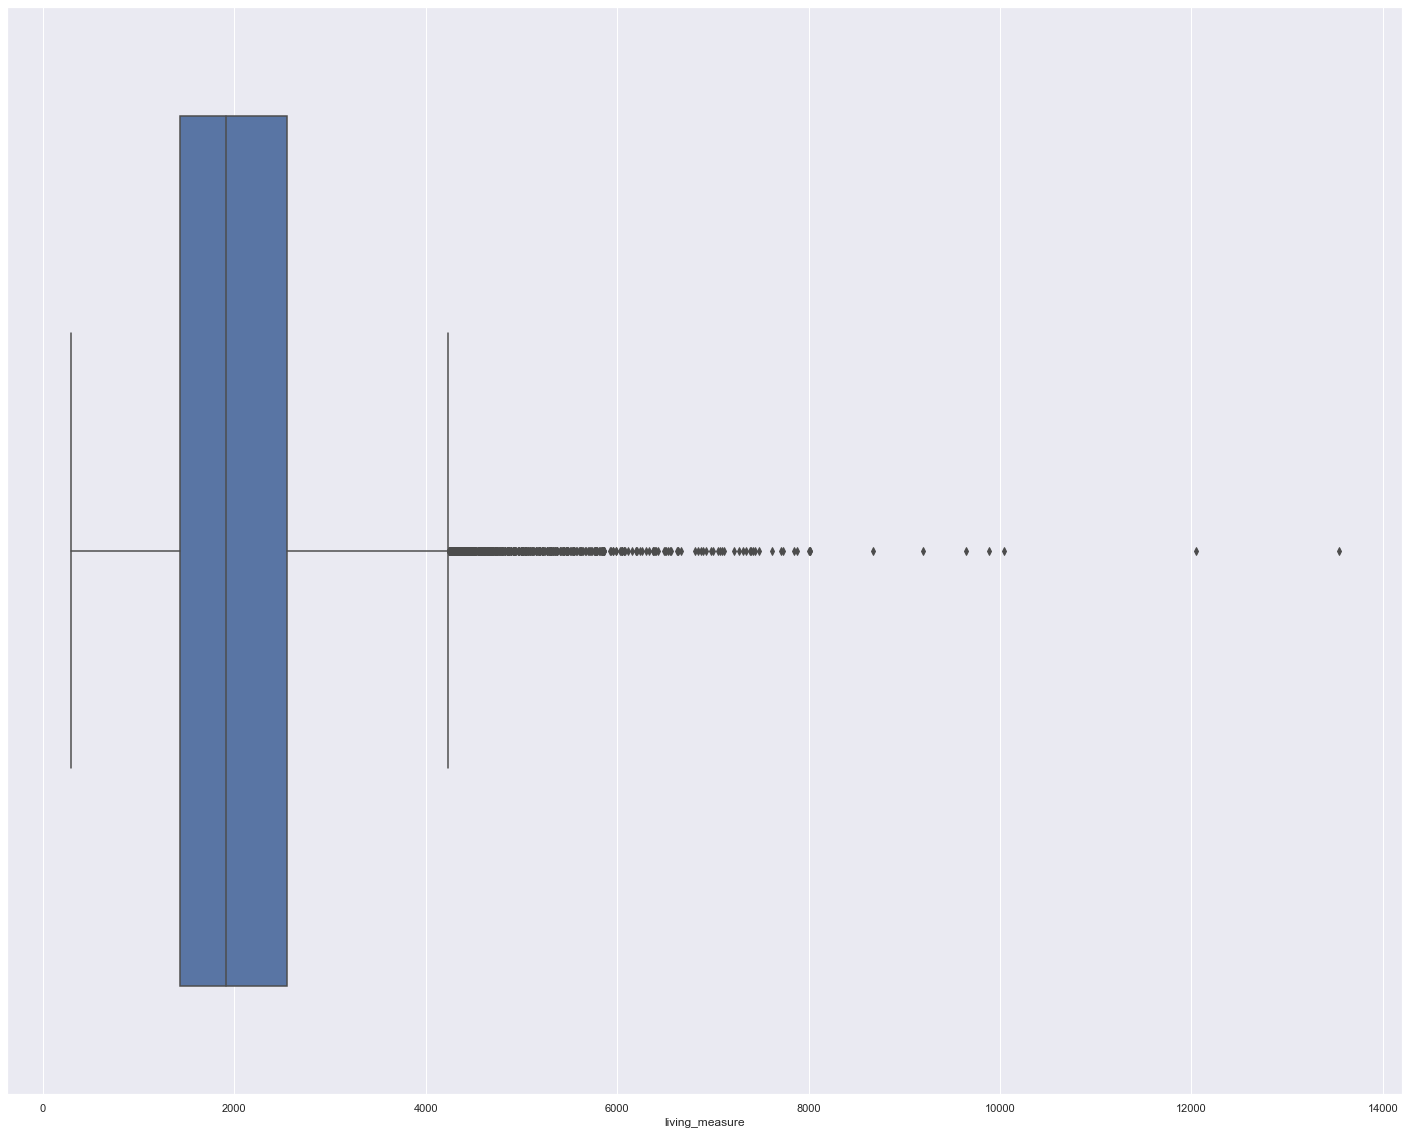

In [1959]:
plt.figure(figsize=(25,20))
sns.boxplot(df['living_measure'])

plot for analysing the columns 'living_measure'and 'price' has to taken from the tableau tool
From the plot it is clearly visible that the average price value increases as the square feet of the house increase.
Boxplot suggests the presence of outliers in the feature.

In [1960]:
df['living_measure'].isnull().sum()
#There are 17 null values present in this column.

17

In [1961]:
df.living_measure.value_counts(ascending=False)
#There are no special characters present in this column

1300.0     138
1400.0     134
1440.0     133
1010.0     129
1800.0     129
1660.0     129
1820.0     128
1720.0     125
1540.0     124
1480.0     124
1560.0     124
1320.0     122
1250.0     120
1580.0     119
1370.0     118
1900.0     117
1780.0     117
1650.0     117
1200.0     117
1460.0     116
1430.0     116
1680.0     116
2100.0     115
1740.0     115
1510.0     114
1830.0     114
1260.0     113
1340.0     113
1640.0     112
1470.0     112
1240.0     112
1610.0     112
1500.0     112
2120.0     111
1790.0     110
1960.0     110
1690.0     110
1670.0     109
1600.0     109
1530.0     109
1410.0     109
1700.0     108
1980.0     105
1590.0     104
2020.0     104
1760.0     104
2040.0     104
2000.0     103
1270.0     102
1520.0     102
1940.0     101
1840.0     101
2240.0     101
1570.0     100
1140.0     100
1280.0     100
1850.0     100
2060.0     100
1730.0     100
1620.0      99
1490.0      99
1770.0      98
1810.0      98
1150.0      98
1890.0      98
2080.0      98
1360.0    

In [1962]:
#Ceil
df.ceil.unique()
#Special characters and null values are present in this column
#Data type here is object which needs to changed to float or int

array([1.0, 2.0, 3.0, 1.5, 2.5, '$', nan, 3.5], dtype=object)

In [1963]:
#Removing the special characters
df['ceil'].value_counts()
#There are 30 special characters present in this column which is to be removed

1.0    10647
2.0     8210
1.5     1905
3.0      610
2.5      161
$         30
3.5        8
Name: ceil, dtype: int64

In [1964]:
#Again in this column(ceil) too we could see $ symbol as it contains we very few values it will be removed
df = df.drop(df[df['ceil'] == '$'].index)

In [1965]:
df['ceil'] = df['ceil'].astype('float')

In [1966]:
#After removing the $ special characters
df['ceil'].unique()

array([1. , 2. , 3. , 1.5, 2.5, nan, 3.5])

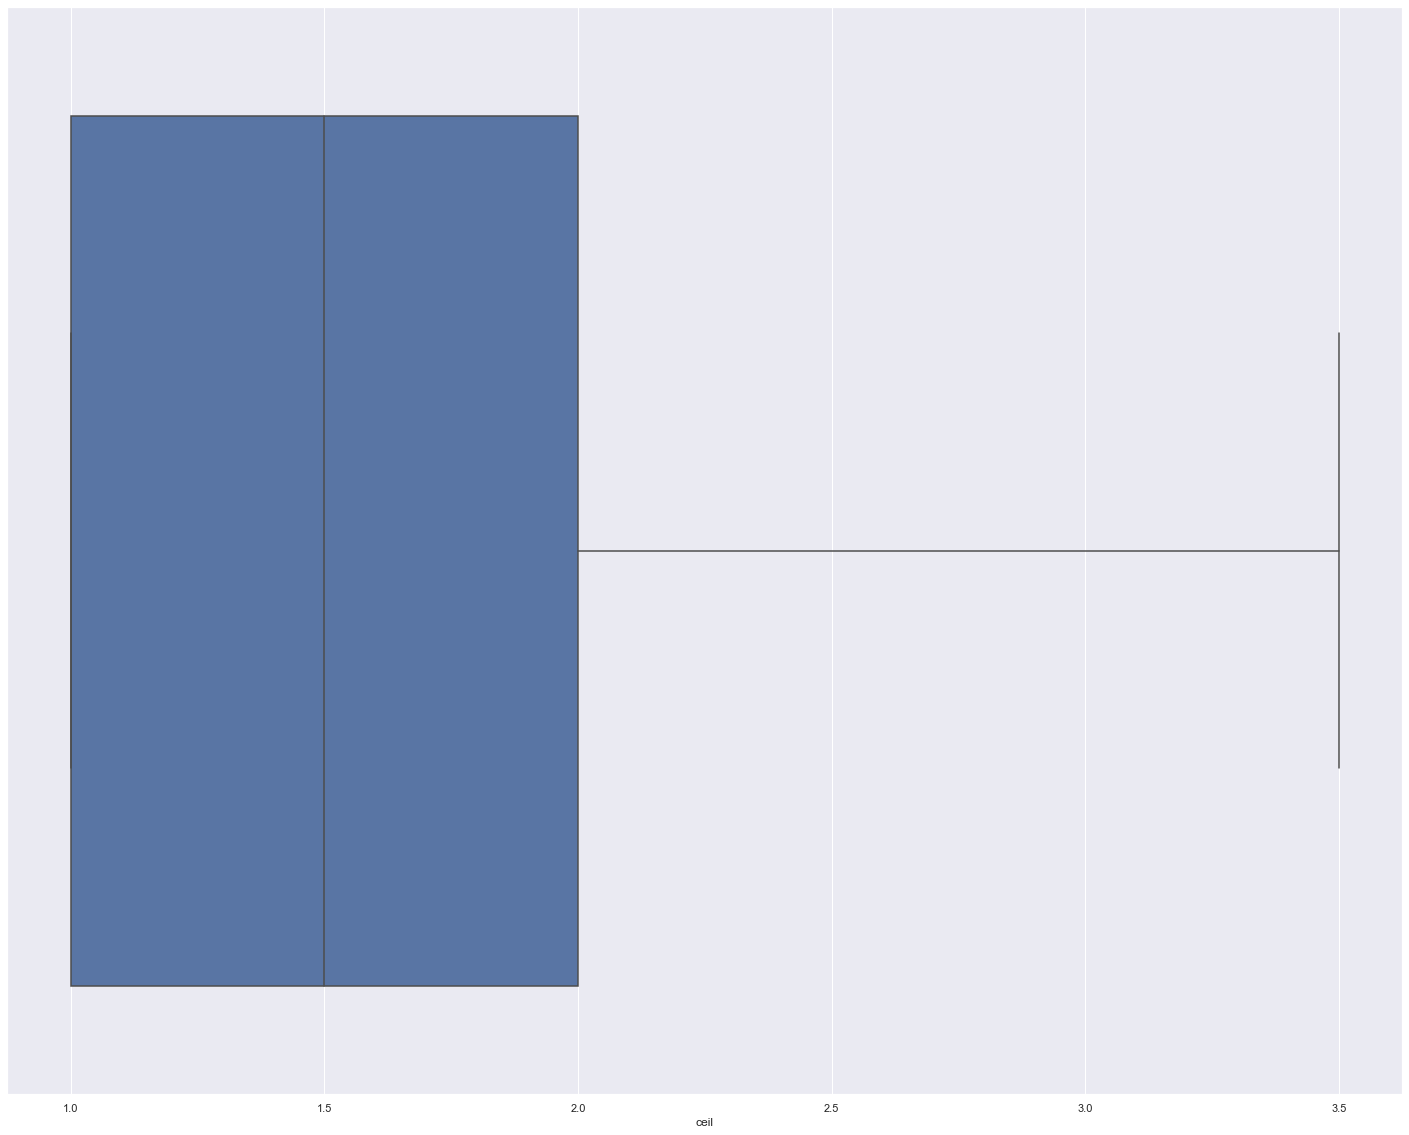

In [1967]:
#Checking for outliers
plt.figure(figsize=(25,20))
sns.boxplot(df['ceil']);
#There are no presence of outliers

<AxesSubplot:xlabel='ceil', ylabel='price'>

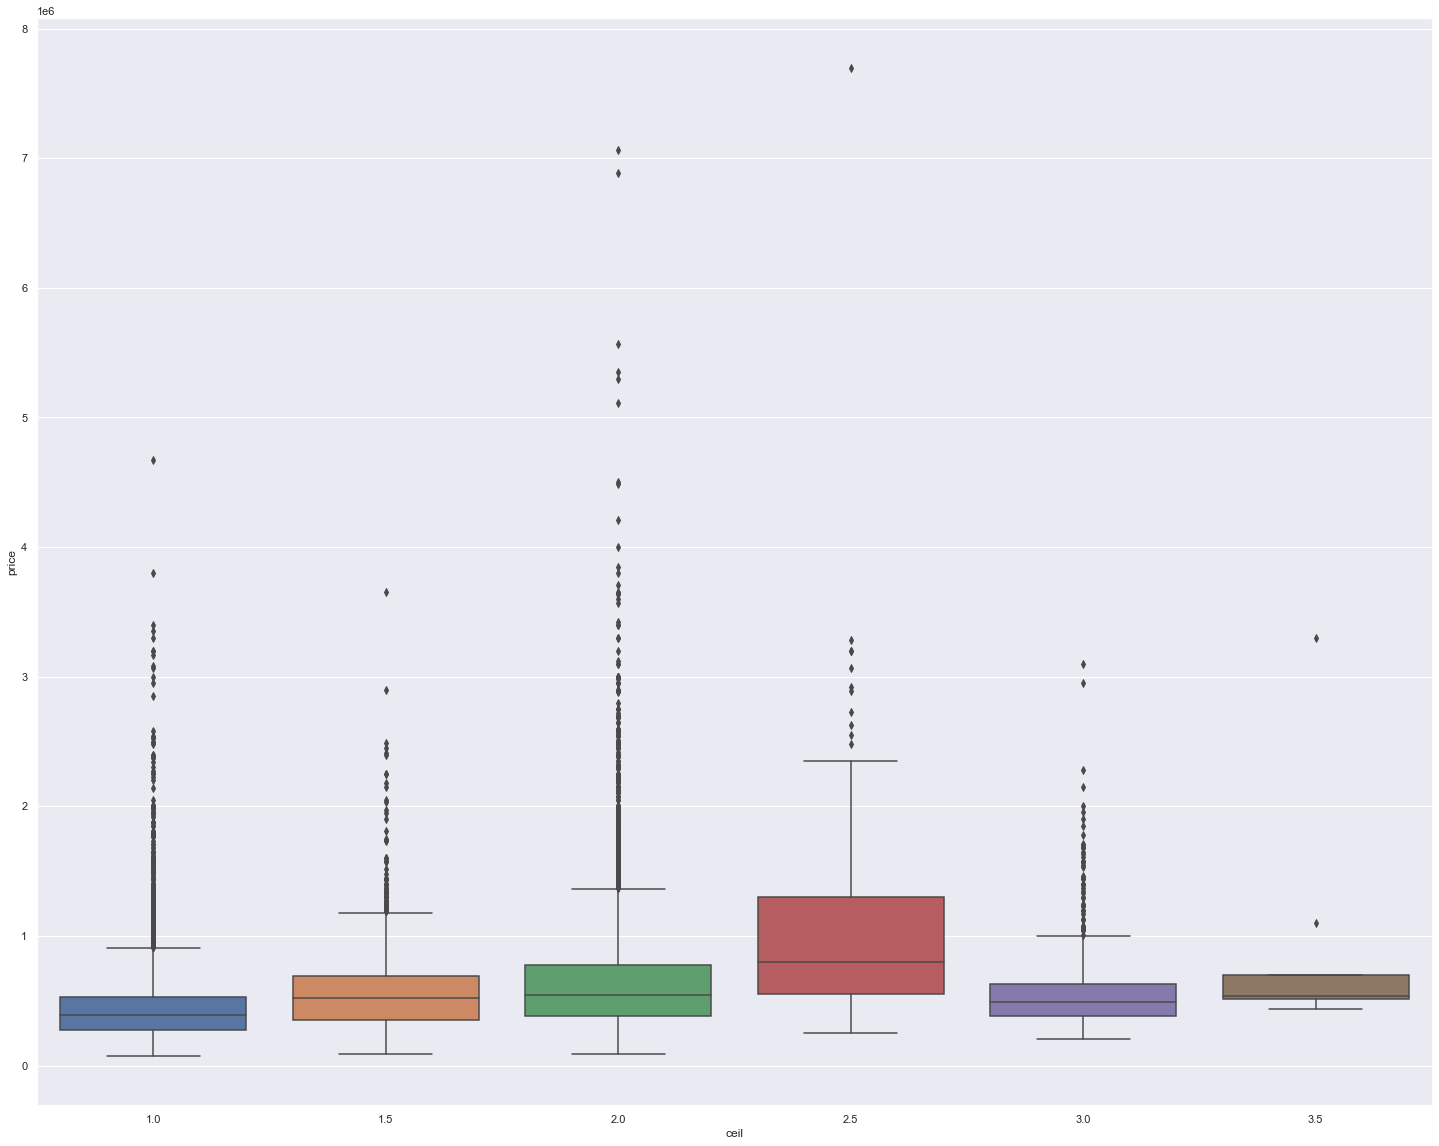

In [1968]:
#Comparing the column ceil with the target column price
plt.figure(figsize=(25,20))
sns.boxplot(df['ceil'],df['price'])
#The sum of price dosent seems to be impacted by the number of floors in a house.
#This could well be because of the area or might also depend on the sq.ft of an building
#it is also observed that the outliers are are visible while comparing the ceil column with the target column.
#The cost of the building dosent seems to be correlated with the price

<AxesSubplot:>

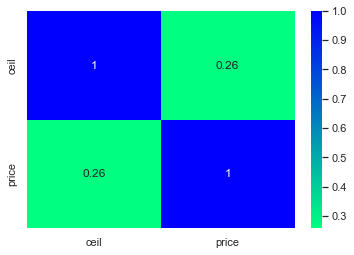

In [1969]:
sns.heatmap(data=df[['ceil','price']].corr(),annot=True,cmap='winter_r')
#As we can see from the heat map that very low correlation between ceil and price

<AxesSubplot:xlabel='coast', ylabel='count'>

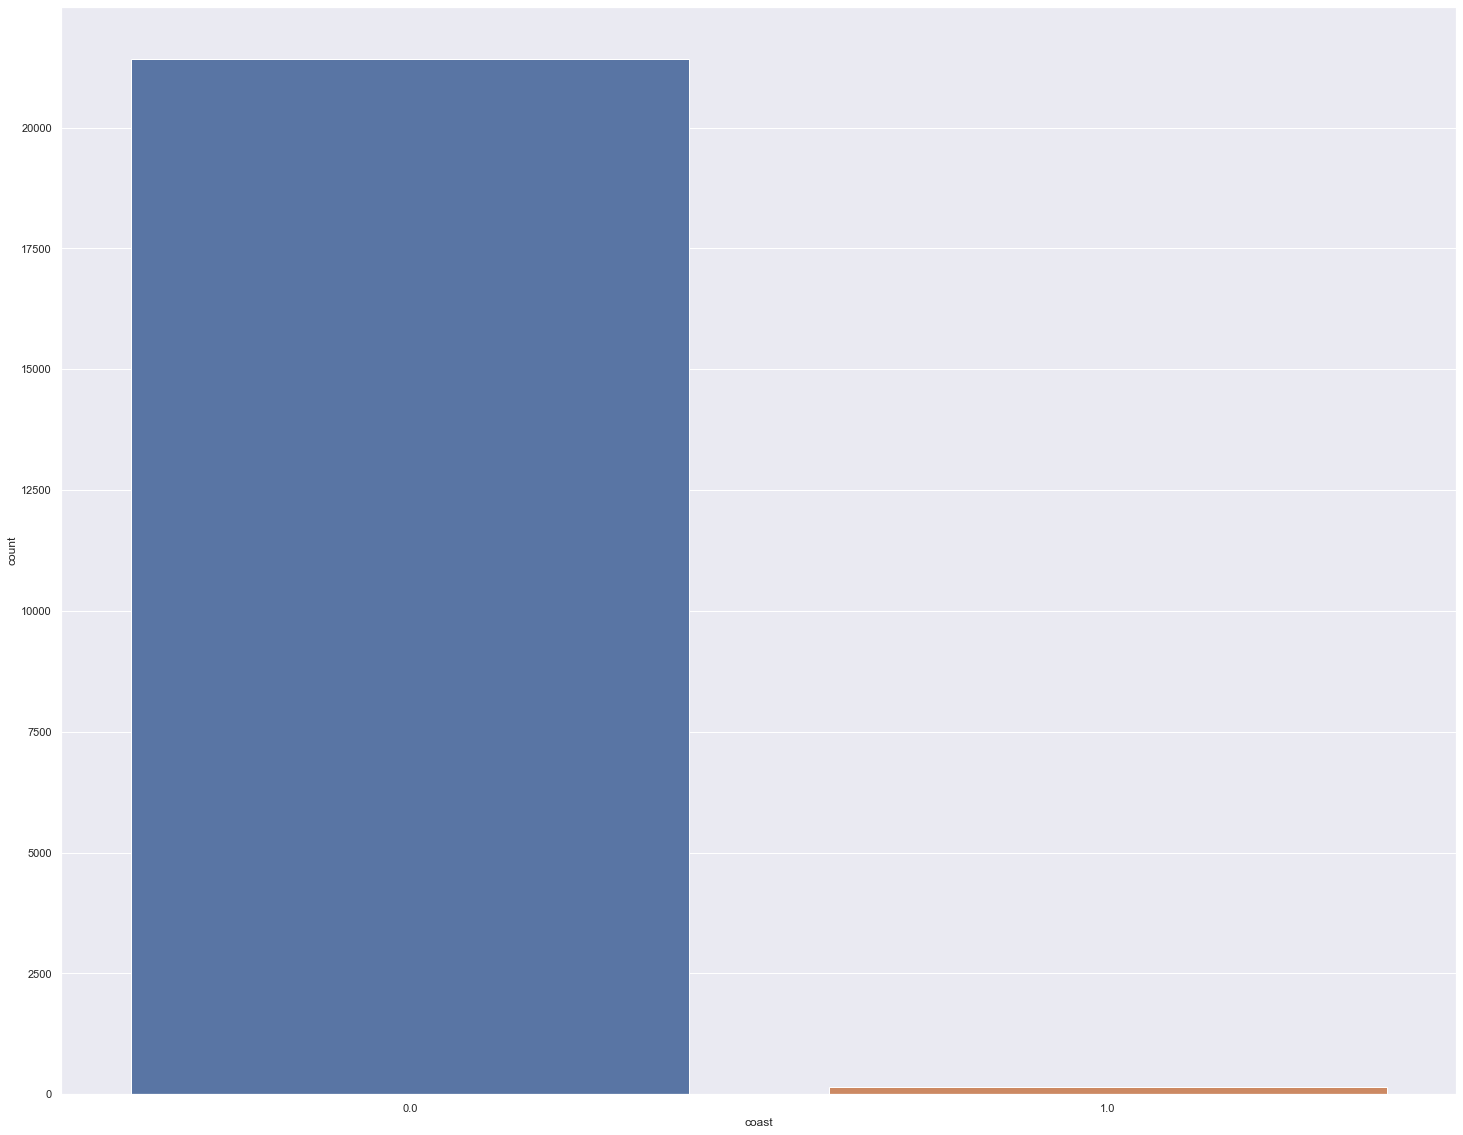

In [1970]:
#coast: House which has a view to a waterfront
#Lets analyse wether the column coast has an impact with the price
plt.figure(figsize=(25,20))
sns.countplot(df['coast'])

In [1971]:
df['coast'].info()

<class 'pandas.core.series.Series'>
Int64Index: 21583 entries, 0 to 21612
Series name: coast
Non-Null Count  Dtype 
--------------  ----- 
21582 non-null  object
dtypes: object(1)
memory usage: 337.2+ KB


In [1972]:
df['coast'].value_counts()
#This column has very less number of 1 which could suggest the presence of House which has a view to a waterfront

0.0    21421
1.0      161
Name: coast, dtype: int64

<AxesSubplot:xlabel='coast', ylabel='price'>

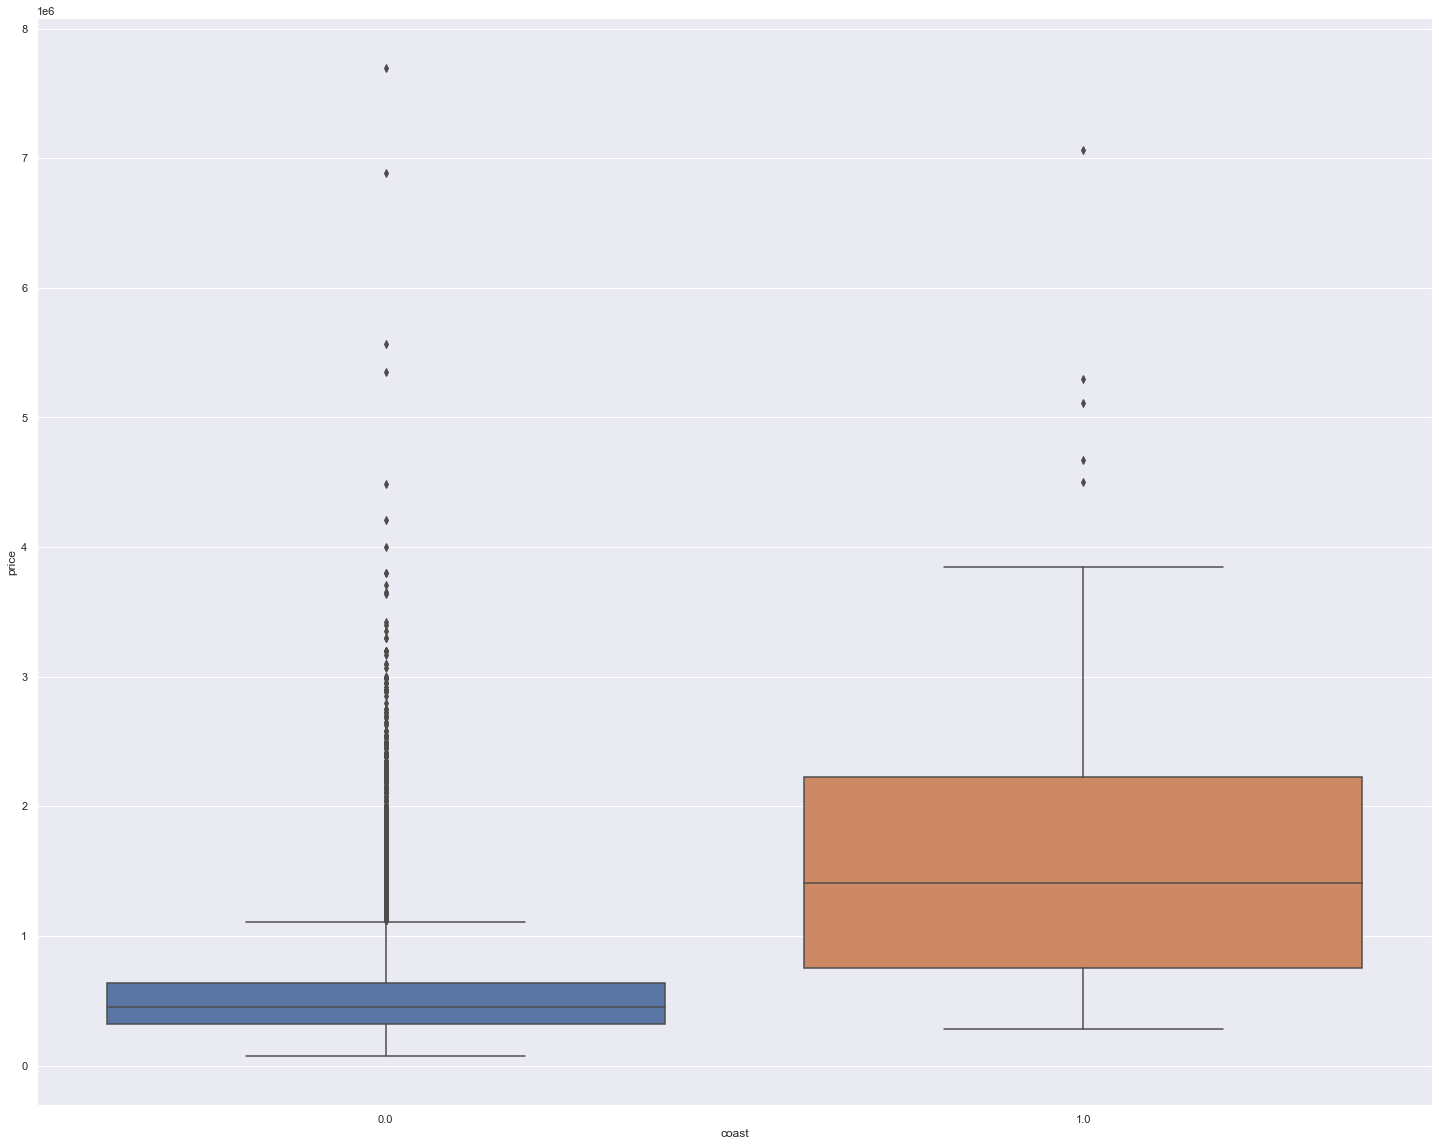

In [1973]:
#let check if it has any impact with the price column
plt.figure(figsize=(25,20))
sns.boxplot(df['coast'],df['price'])
#Definitely their is an impact in the price of an house if it has the waterfront view the price of an house coast more.

In [1974]:
df['coast'].unique()
#There are null values present in this column

array([0.0, 1.0, nan], dtype=object)

<AxesSubplot:xlabel='coast'>

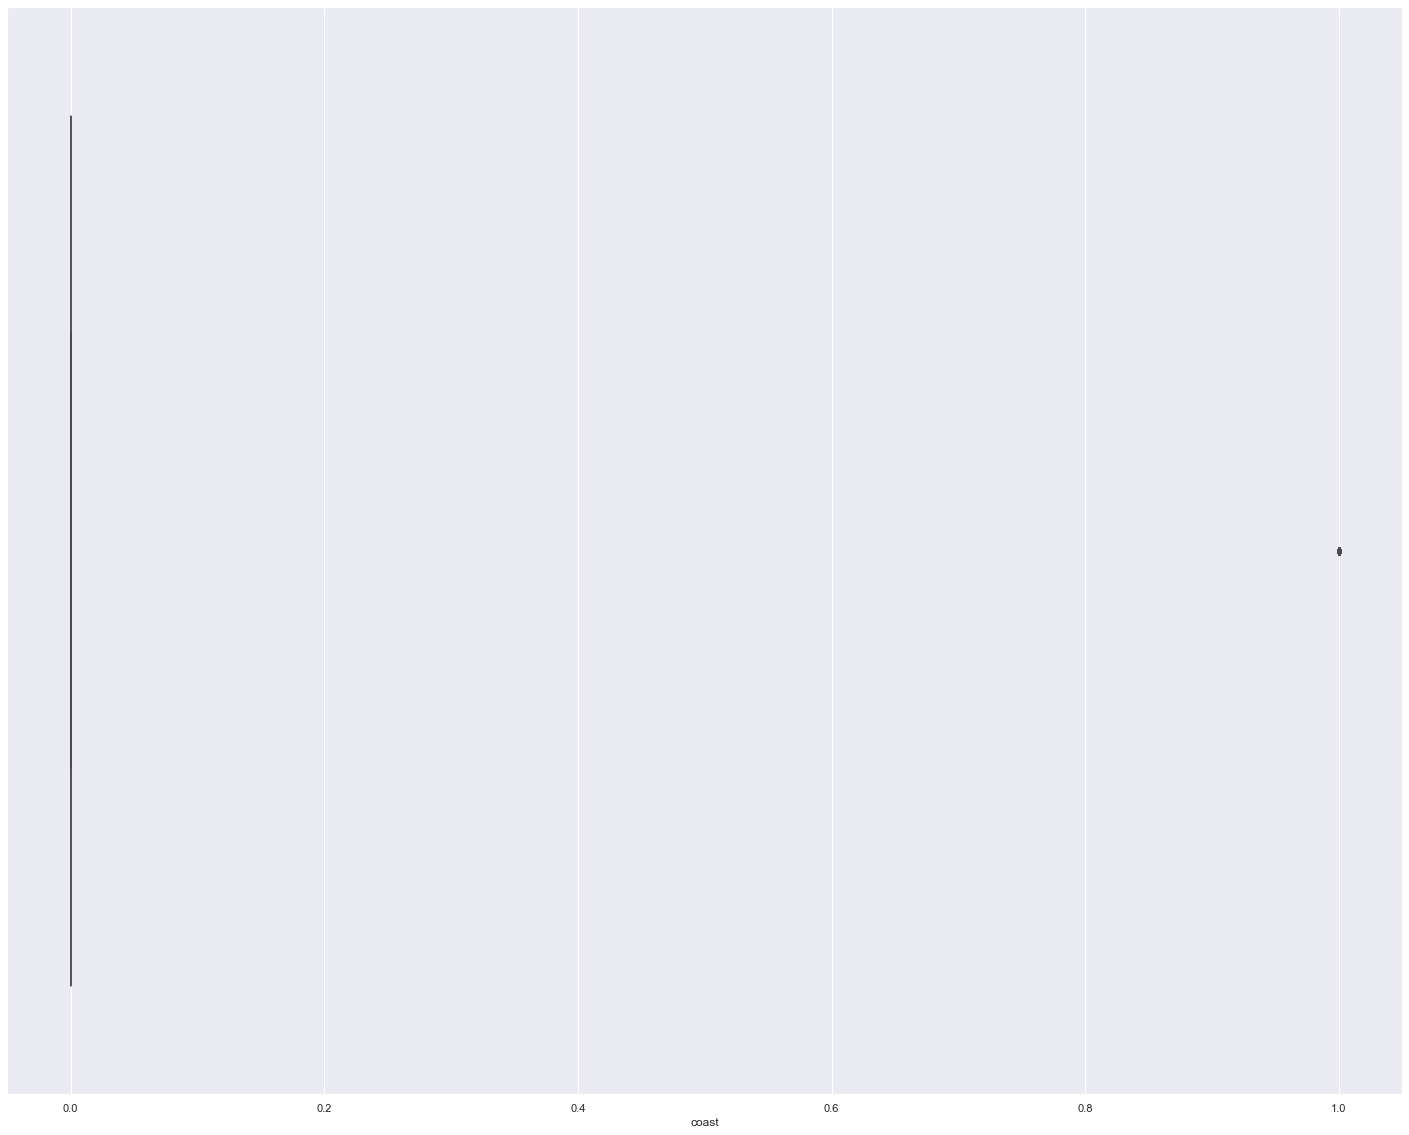

In [1975]:
plt.figure(figsize=(25,20))
sns.boxplot(df['coast'])
#Even though this column in unbalanced it is not recommended to remove it as we colud see the presence of 
#water front view has a good impact towards the price of an house

In [1976]:
#sight: Has been viewed
df['sight'].unique()
#Null value is present in this column

array([ 0.,  4.,  2.,  3.,  1., nan])

In [1977]:
df['sight'].value_counts()
#This column gives an info about the number of times an house is been viewd by the customers.
#Or it can also suggest the types of houses that are preferred by the customers.
#From the understanding of the dataset so far this column dosent seem to have an bigger impact in anlalyzing the price of an property.
#Allthough we will plot an univariant and bivariant graph to confirm the same.
#Here in the below data frame we could see there is no presence of special characters in this column.

0.0    19412
2.0      958
3.0      507
1.0      332
4.0      317
Name: sight, dtype: int64

<AxesSubplot:xlabel='sight', ylabel='count'>

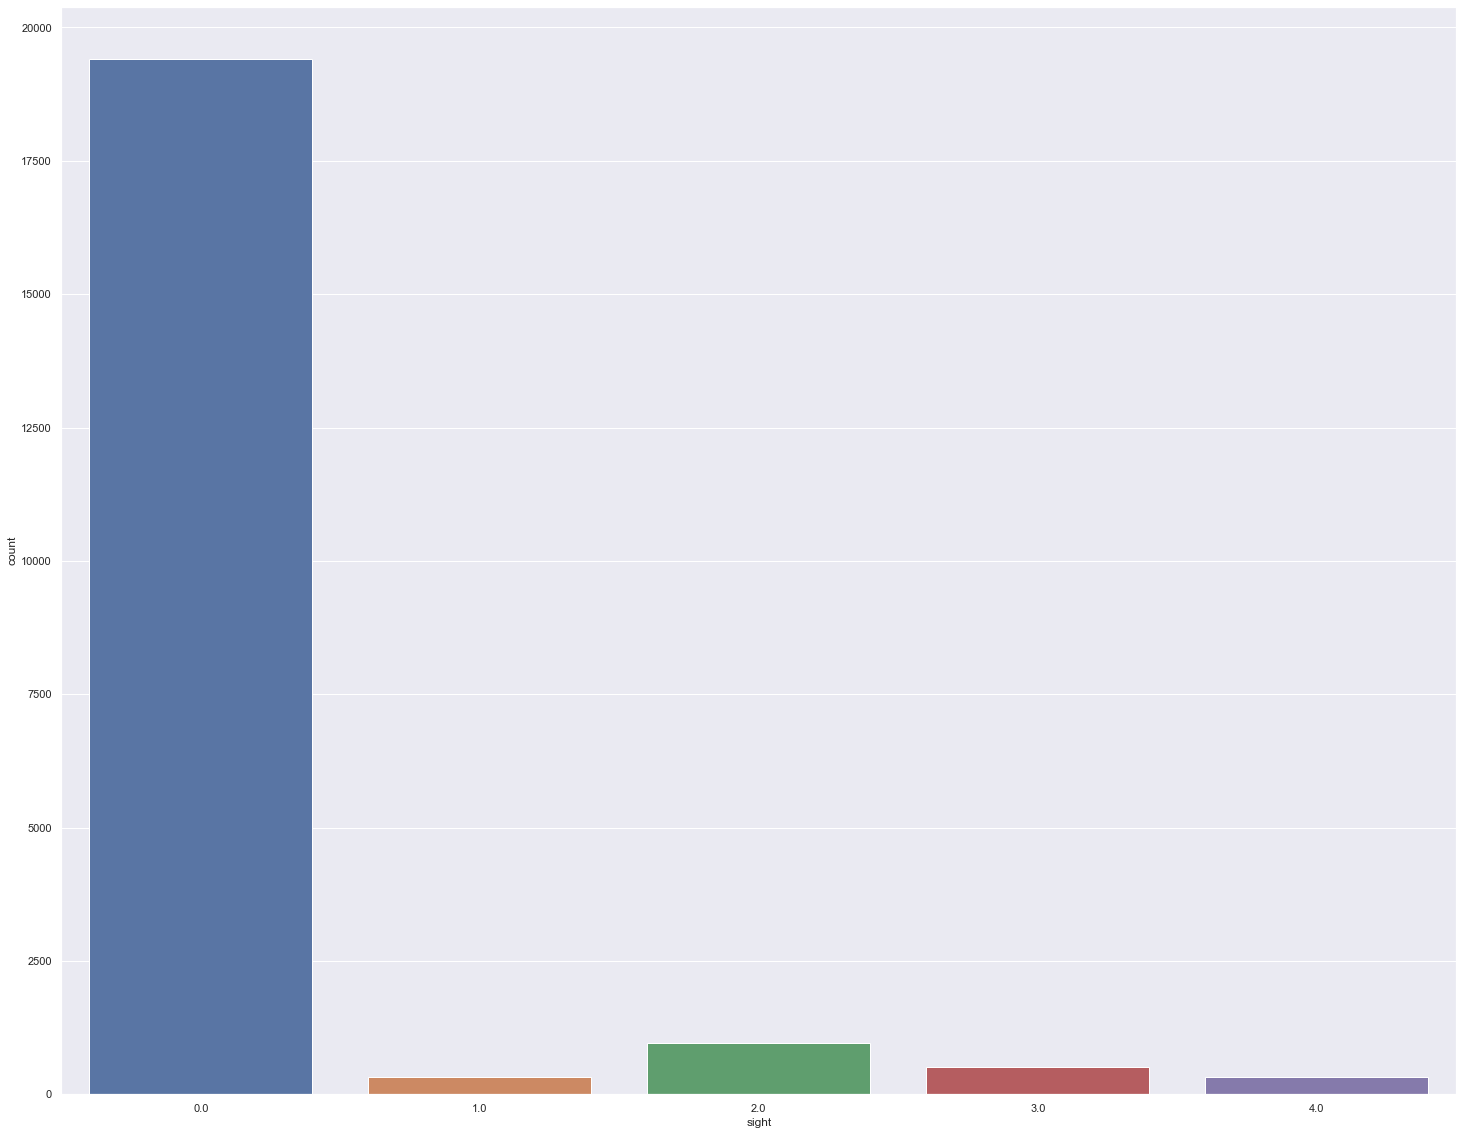

In [1978]:
plt.figure(figsize=(25,20))
sns.countplot(df['sight'])

<AxesSubplot:xlabel='sight', ylabel='price'>

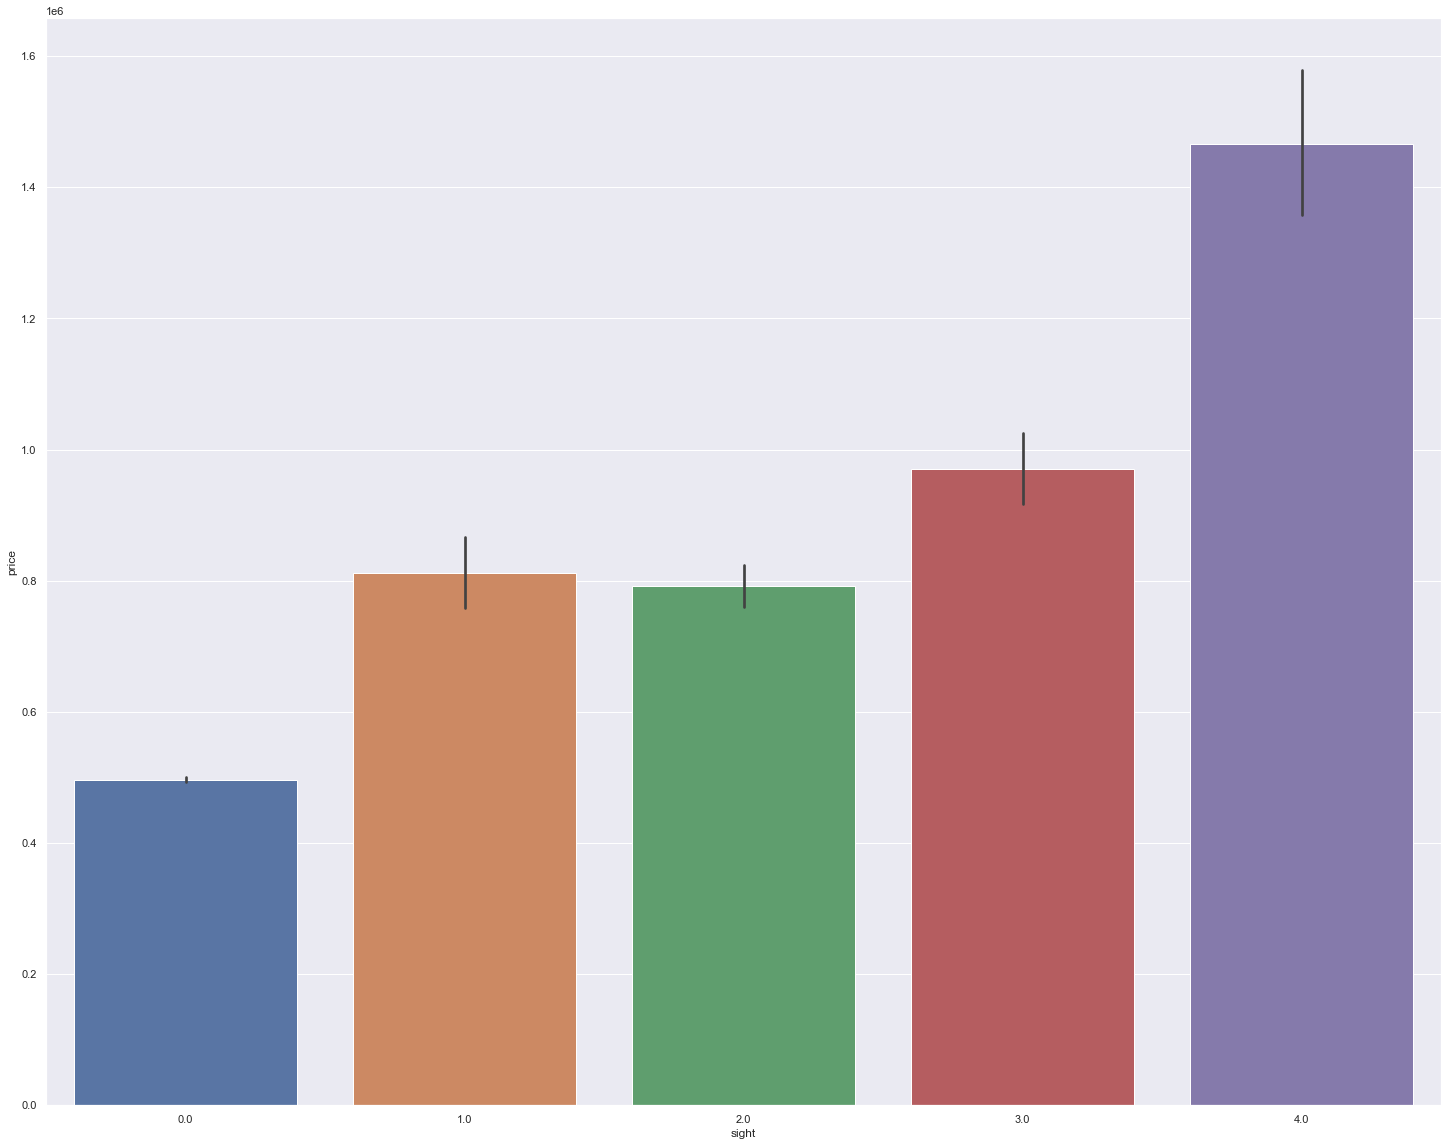

In [1979]:
plt.figure(figsize=(25,20))
sns.barplot(df['sight'],df['price'])
#Seems like there will be some impact interms of pricing the property w.r.t sight column

<AxesSubplot:>

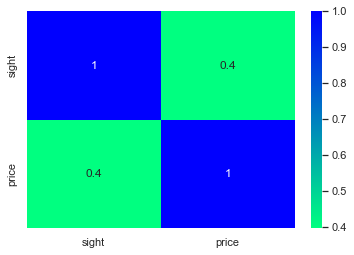

In [1980]:
sns.heatmap(df[['sight','price']].corr(),annot=True,cmap='winter_r')

In [1981]:
#condition: How good the condition is (Overall)
#This column might be one of the important features as the condition of the house might play an important role during sales
#Lest understand our assumptions by doing the univariant and bivariant plots.
df['condition'].info()

<class 'pandas.core.series.Series'>
Int64Index: 21583 entries, 0 to 21612
Series name: condition
Non-Null Count  Dtype 
--------------  ----- 
21526 non-null  object
dtypes: object(1)
memory usage: 337.2+ KB


In [1982]:
df['condition'].value_counts()
#Presence of special characters must be removed.

3.0    13958
4.0     5649
5.0     1690
2.0      171
1.0       30
$         28
Name: condition, dtype: int64

In [1983]:
#Again in this column(condition) too we could see $ symbol as it contains we very few values it will be removed
df = df.drop(df[df['condition'] == '$'].index)

In [1984]:
df['condition'].unique()
#Null values are presnt in this column which needs to be treated.

array([3.0, 4.0, 5.0, 2.0, nan, 1.0], dtype=object)

<AxesSubplot:xlabel='condition', ylabel='count'>

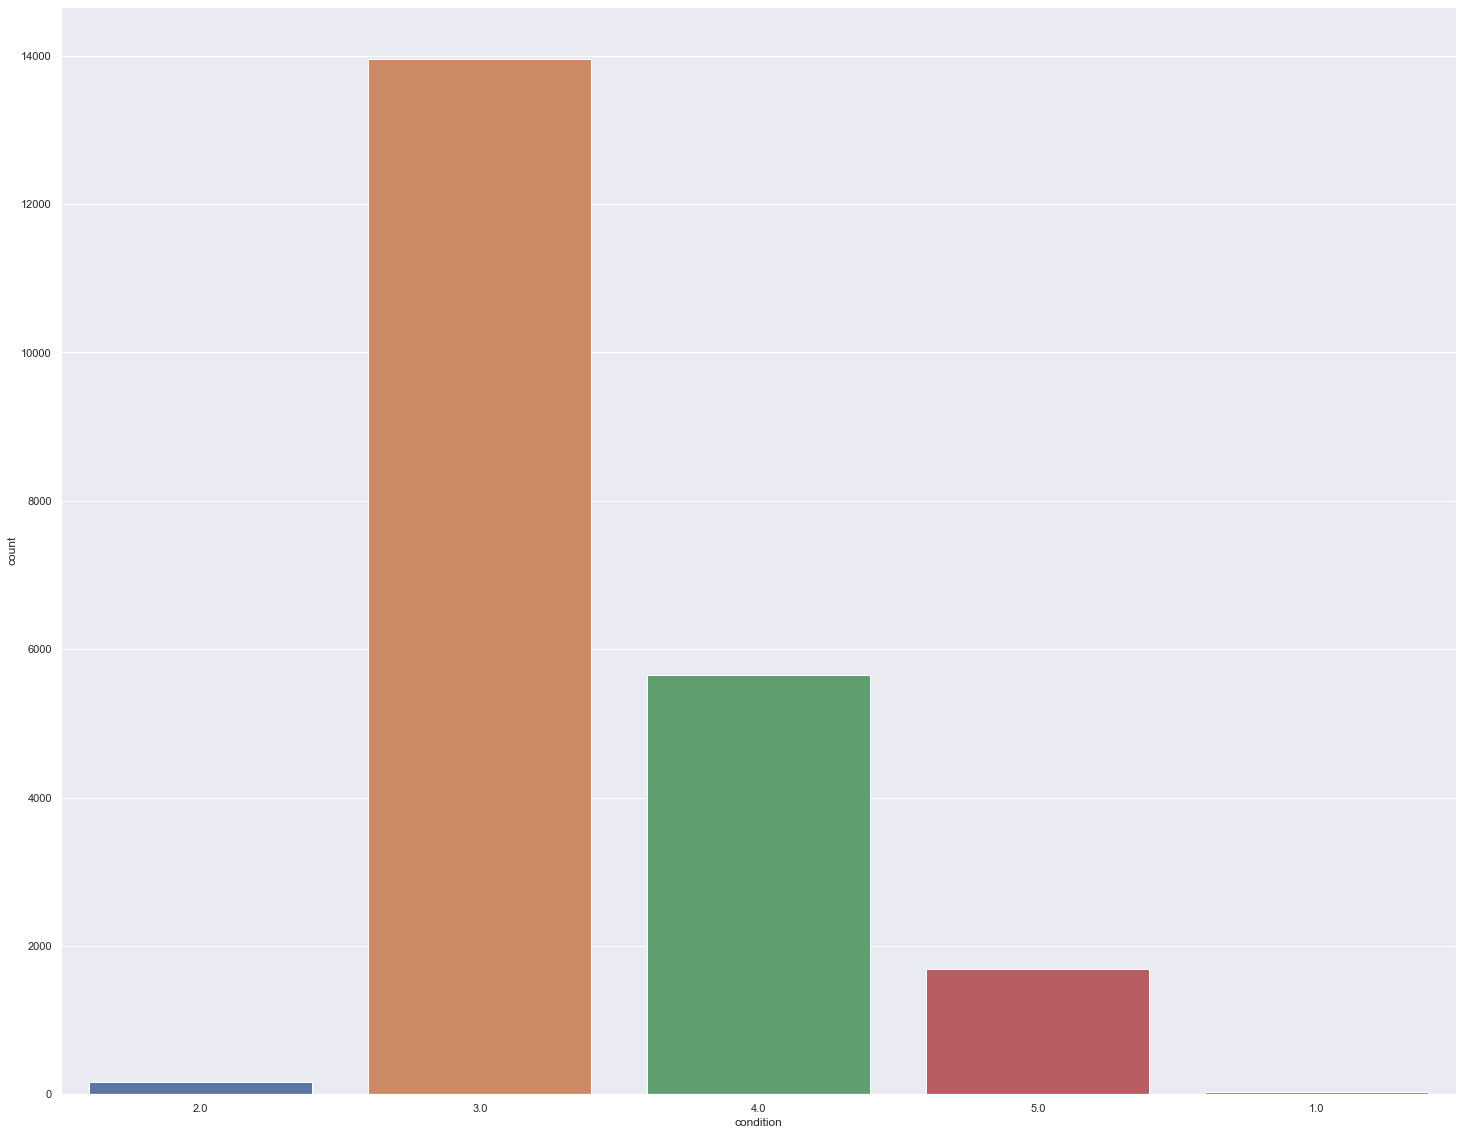

In [1985]:
plt.figure(figsize=(25,20))
sns.countplot(df['condition'])
#As per the understanding of the dataset the condition of the house are rated in a scale of 1-5.
#By an assumption that 1 being the lowest and 5 being the highest.
#From the below mentioned barplot here we can clearly see that properties mentioned in the data sets are mostly rated on the scale of Average

<AxesSubplot:xlabel='condition', ylabel='price'>

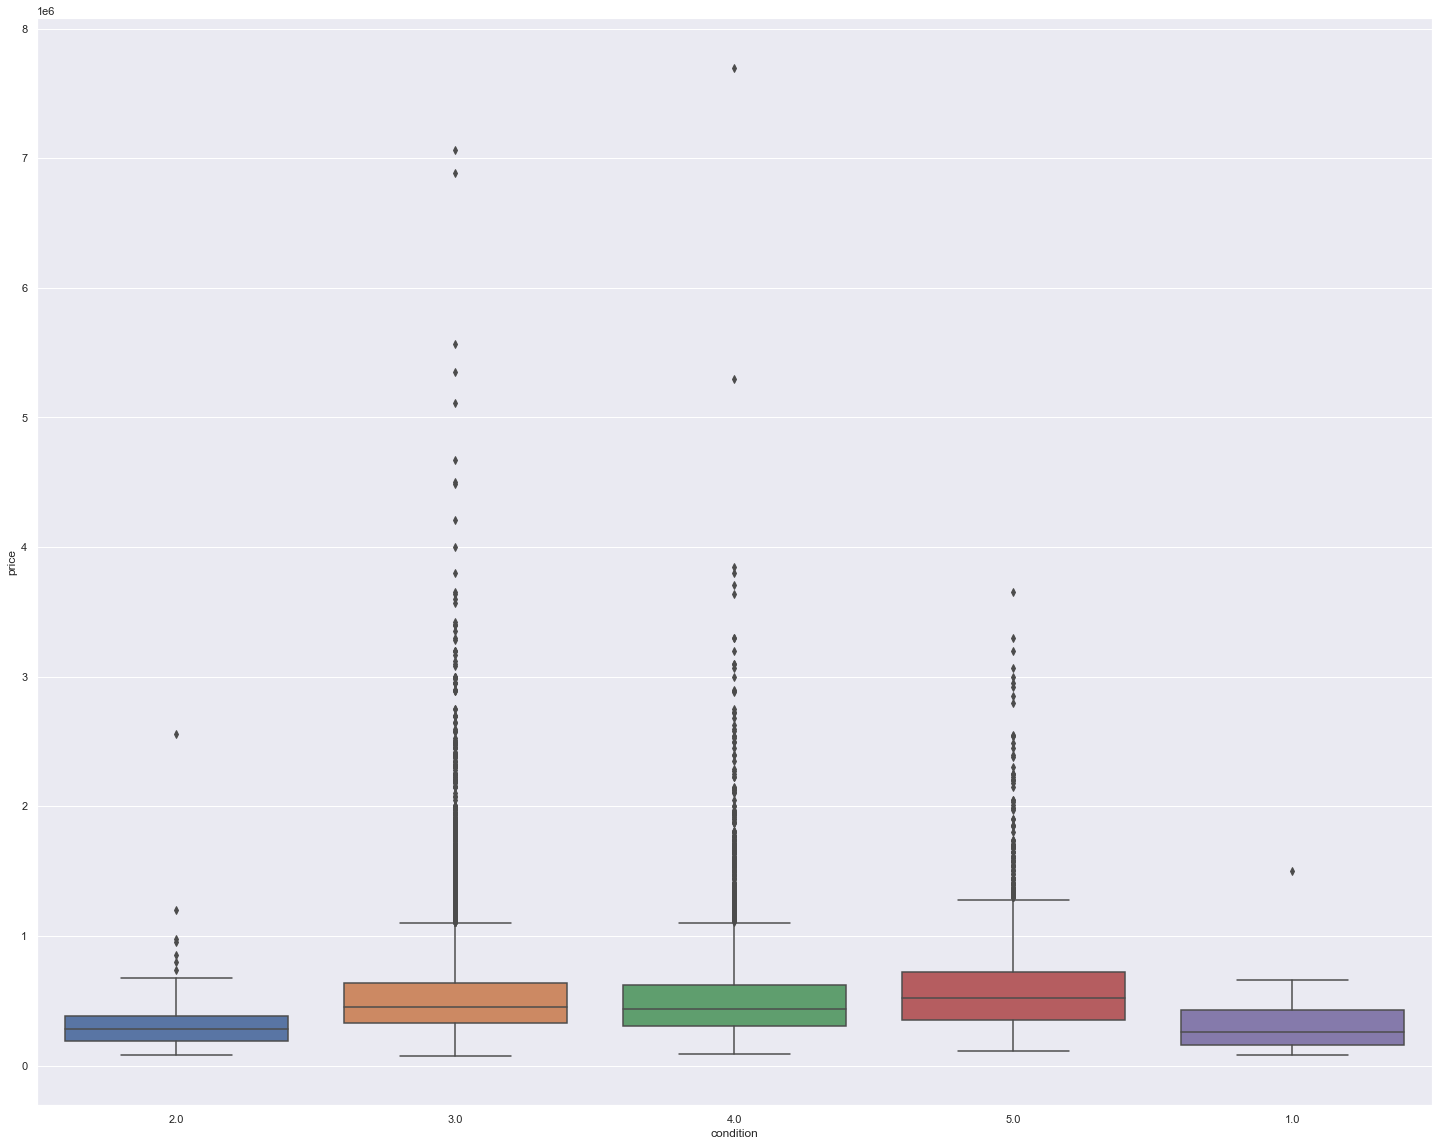

In [1986]:
#Let's now check the Correlation and boxplot to understand how the condition column is related to price
plt.figure(figsize=(25,20))
sns.boxplot(df['condition'],df['price'])
#As we can see the condition of the house if it is 1 the price value is low
#The value of house if been rated as 5 there is increase in price range compared to boxplots

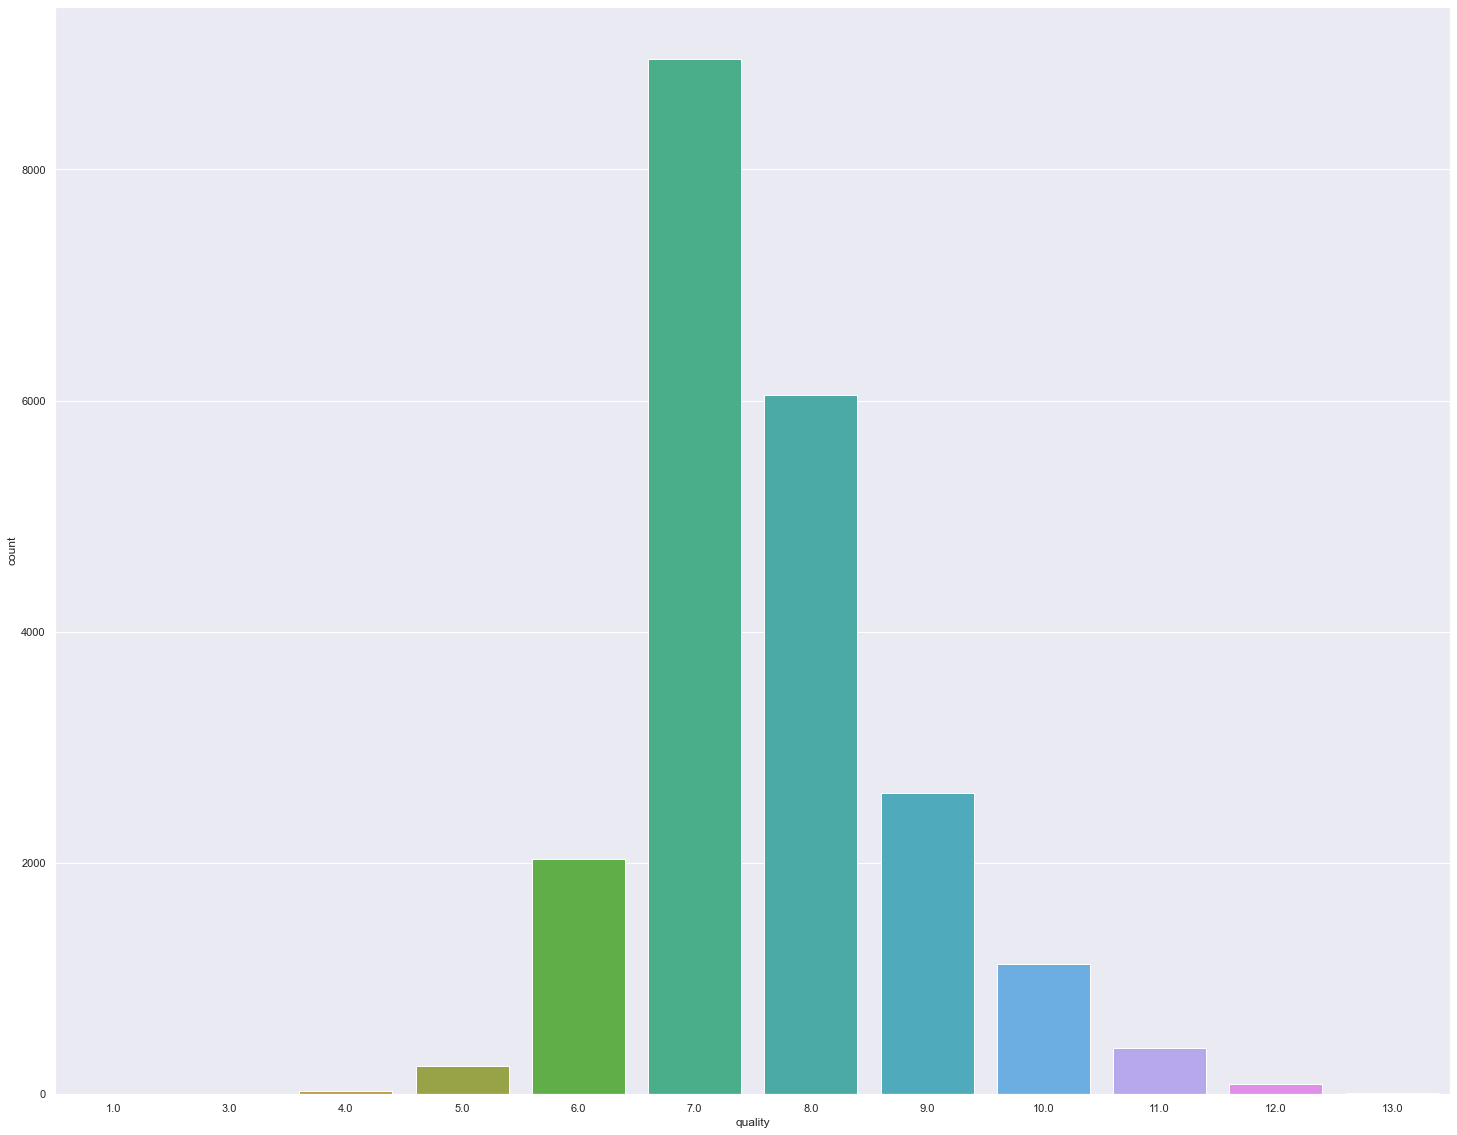

In [1987]:
#quality
plt.figure(figsize=(25,20))
sns.countplot(df['quality']);
#The grading system suggest the quality of the house and this helps a customers to estiamte the house or fix a price for it
#The grading can be done up various other factors as well.

<AxesSubplot:xlabel='quality', ylabel='price'>

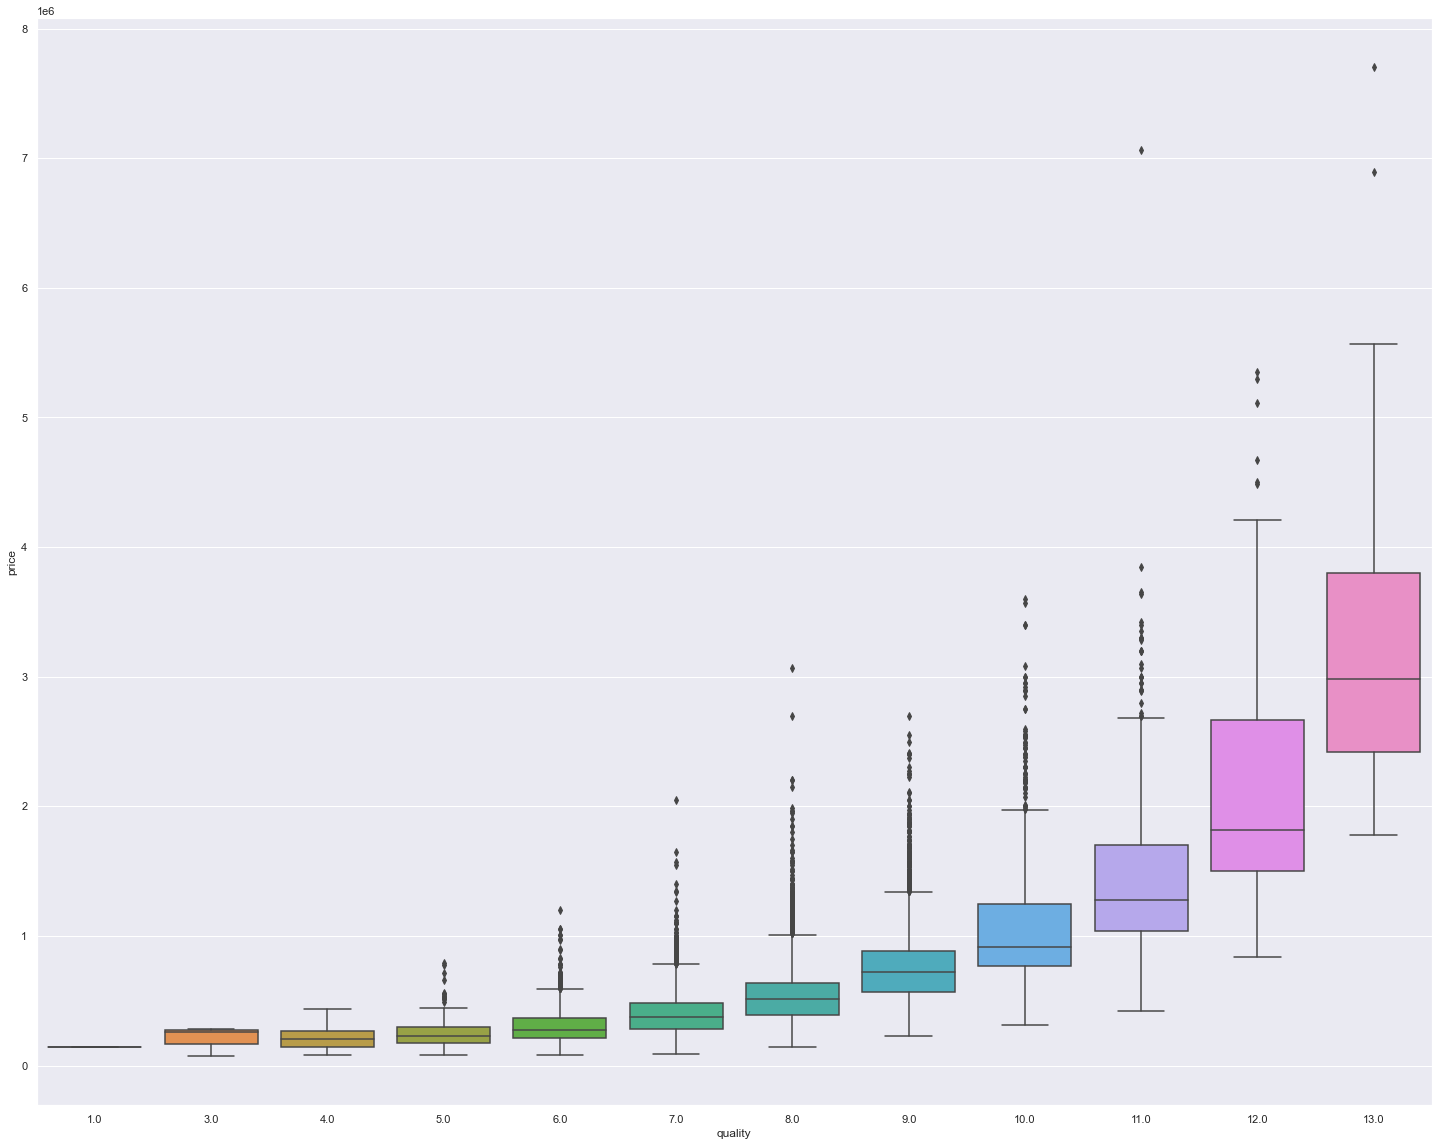

In [1988]:
#Compare the quality column with target column price
plt.figure(figsize=(25,20))
sns.boxplot(df['quality'],df['price'])
#As the quality or the grading is high the price invariably increases as well.

In [1989]:
#Checking for null values and special characters
df['quality'].value_counts()

7.0     8957
8.0     6049
9.0     2608
6.0     2033
10.0    1131
11.0     398
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: quality, dtype: int64

In [1990]:
df['quality'].unique()
#Presence of null value is confirmed.

array([ 8.,  6.,  7., 10.,  9.,  5., 11., 13.,  4., 12.,  1.,  3., nan])

In [1991]:
#yr_built: Built Year
df['yr_built'].value_counts()
#Special character $ has 14 values in it which is to be removed from this column.

2014.0    558
2006.0    453
2005.0    448
2004.0    432
2003.0    420
1977.0    417
2007.0    416
1978.0    387
1968.0    380
2008.0    364
1967.0    350
1979.0    343
1959.0    333
1990.0    319
1962.0    312
2001.0    302
1954.0    302
1987.0    292
1989.0    287
1969.0    279
1988.0    270
1955.0    269
1999.0    265
1947.0    259
1963.0    256
1976.0    253
1966.0    250
1950.0    249
1994.0    249
1960.0    246
1980.0    240
1998.0    238
1948.0    235
2009.0    229
1984.0    228
1951.0    227
1985.0    227
1991.0    224
1958.0    223
1942.0    222
1961.0    222
1953.0    222
1952.0    220
2002.0    220
2000.0    218
1986.0    214
1983.0    211
1993.0    202
2013.0    201
1981.0    199
1957.0    198
1992.0    198
1956.0    197
1996.0    195
1949.0    195
1975.0    189
1965.0    186
1926.0    179
1997.0    174
1964.0    172
2012.0    170
1943.0    170
1995.0    167
1925.0    165
1974.0    162
1941.0    161
1940.0    155
1972.0    148
1973.0    147
2010.0    143
1944.0    140
1924.0

In [1992]:
#Again in this column(yr_built) too we could see $ symbol as it contains we very few values it will be removed
df = df.drop(df[df['yr_built'] == '$'].index)

In [1993]:
df['yr_built'].unique()
#Null values are present in this data set.

array([1966.0, 1948.0, 2009.0, 1924.0, 1994.0, 2005.0, 1978.0, 1983.0,
       2012.0, 1912.0, 1990.0, 1967.0, 1919.0, 1908.0, 1950.0, 2000.0,
       2013.0, 1943.0, 1922.0, 1977.0, 2004.0, 1935.0, 1964.0, 1945.0,
       1987.0, 2008.0, 1940.0, 2003.0, 1988.0, 1985.0, 1998.0, 1995.0,
       1946.0, 1984.0, 1958.0, 1963.0, 1942.0, 2014.0, 1971.0, 1936.0,
       1954.0, 1923.0, 2002.0, 1972.0, 2007.0, 1930.0, 1962.0, 1999.0,
       1953.0, 1965.0, 2010.0, 1997.0, 2006.0, 1979.0, 1996.0, 1992.0,
       1968.0, 1980.0, 1981.0, 1969.0, 2001.0, 1929.0, 1952.0, 1916.0,
       1976.0, 1974.0, 1920.0, 1931.0, 1975.0, 1960.0, 1900.0, 1986.0,
       1989.0, 1906.0, 1955.0, 1956.0, 1915.0, 1941.0, 1993.0, 2011.0,
       1925.0, 1947.0, 1991.0, 1926.0, 1927.0, 1951.0, 1961.0, 1932.0,
       1917.0, 1928.0, 1959.0, 1921.0, 1911.0, 1949.0, 1982.0, 1913.0,
       1957.0, 1914.0, 1938.0, 1973.0, 1937.0, 1944.0, 1970.0, 1901.0,
       1907.0, 1939.0, 1918.0, 1934.0, 1904.0, 2015.0, 1909.0, 1910.0,
      

<AxesSubplot:xlabel='yr_built'>

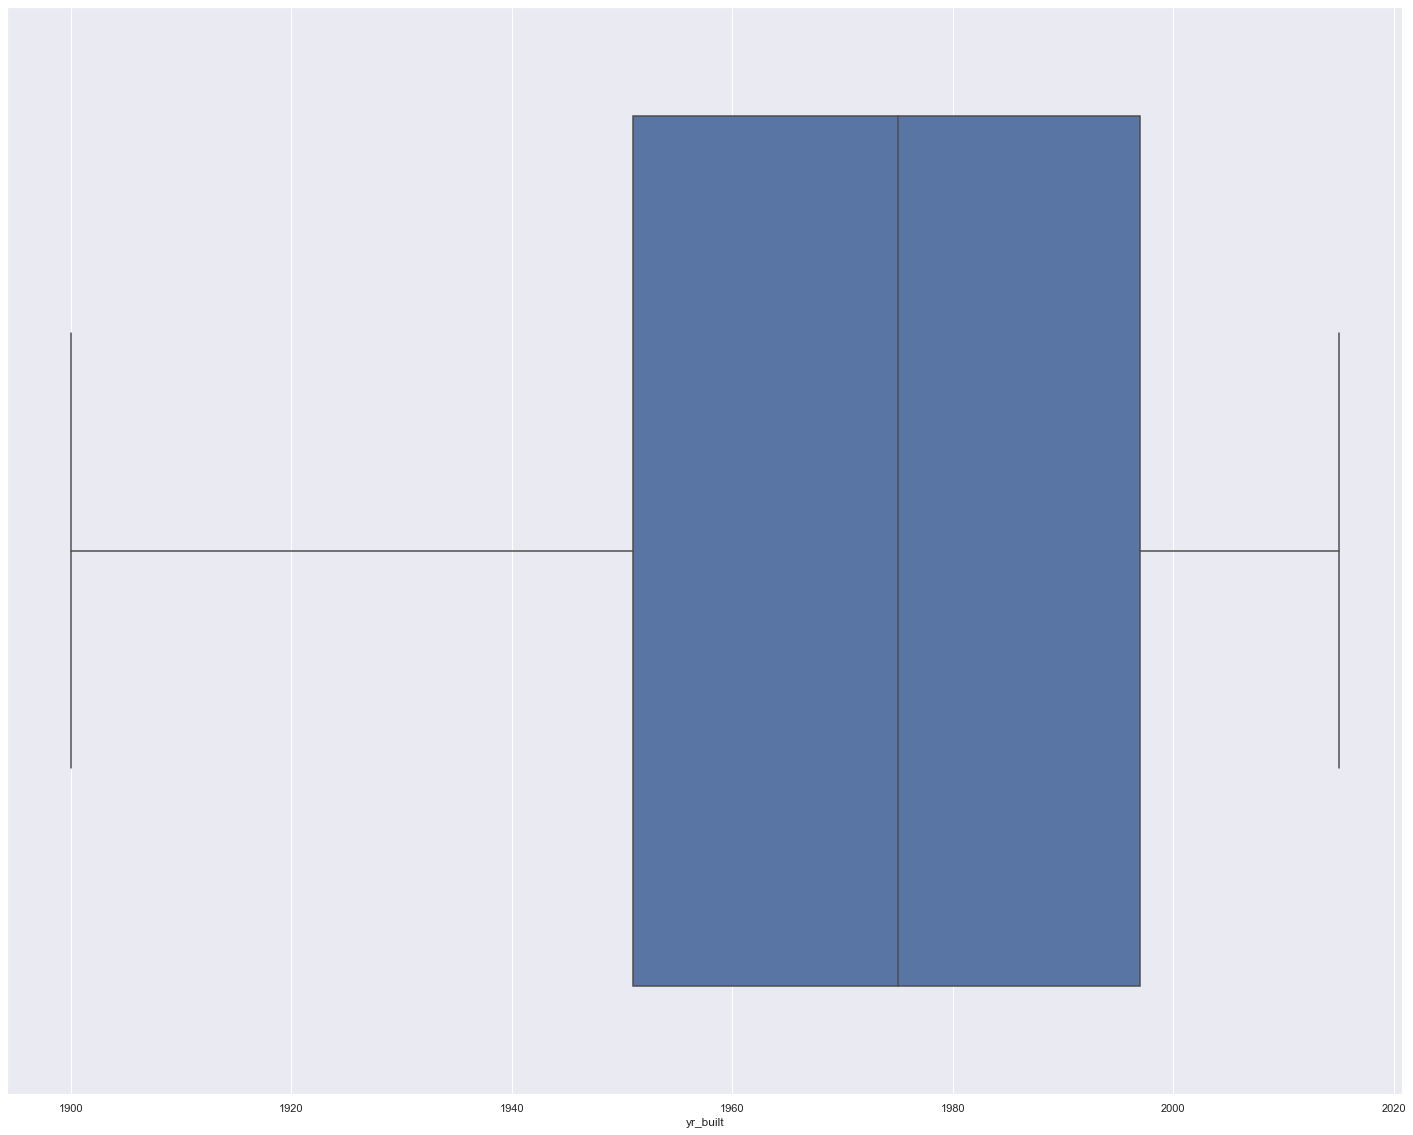

In [1994]:
plt.figure(figsize=(25,20))
sns.boxplot(df['yr_built'])
#The average date of construction for the houses in this data set is approximately between 1975-1978, 
#which extends to as old as 1900 and as new as to 2019

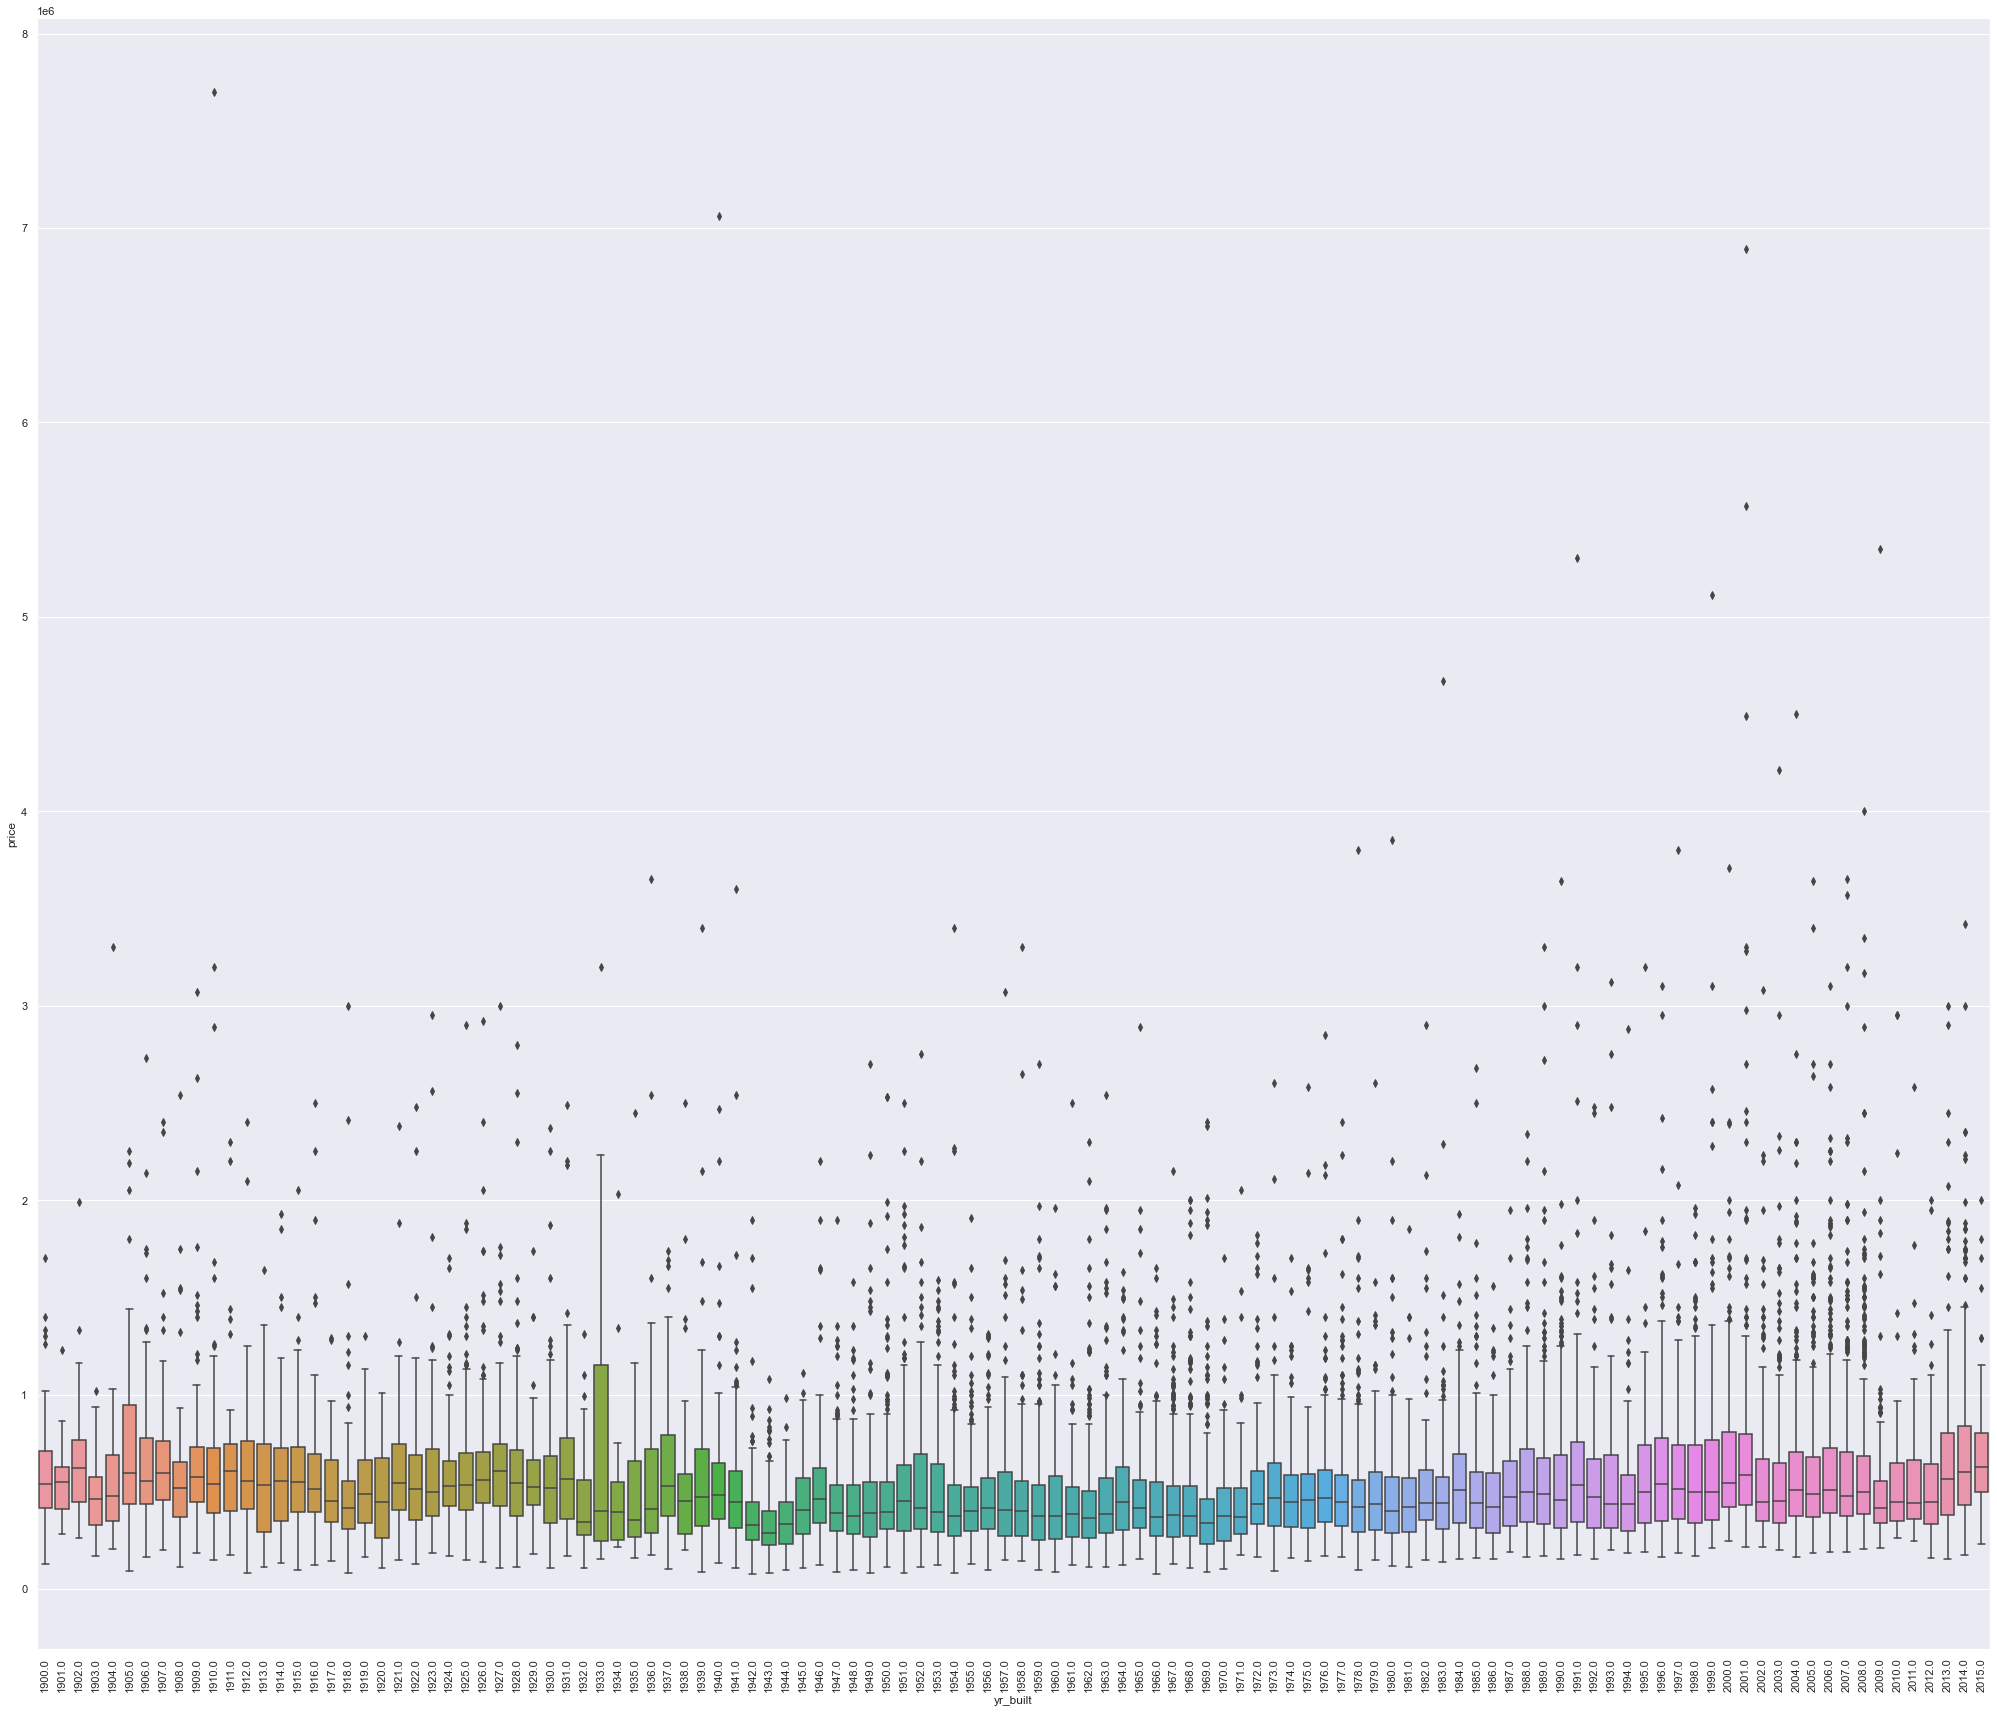

In [1995]:
#Comparing it with the target column
plt.figure(figsize=(35,30))
sns.boxplot(df['yr_built'],df['price'])
plt.xticks(rotation=90);
#Line plot for comparion between yr-built and price has to be taken from the tableau tool.
#The feature yr-built dosent seem to influece the price
#The price of the building depends on the quality, location sq.feet and some other factors.

In [1996]:
#yr_renovated: Year when house was renovated
#This could be the cause factor for influencing the price of an house
#Let's analyse in detail about this feature
df['yr_renovated'].value_counts()
#Looks like there are no special characters present in this column
#Assuming that 0.0 represents houses that are not renovated at all.

0.0       20632
2014.0       91
2013.0       37
2003.0       36
2000.0       35
2007.0       35
2005.0       35
2004.0       26
2006.0       24
1990.0       24
2002.0       22
1989.0       22
2009.0       21
1991.0       20
1998.0       19
2001.0       19
1994.0       19
1993.0       19
1987.0       18
1983.0       18
2010.0       18
2008.0       18
1984.0       17
1992.0       17
1999.0       17
1985.0       17
1995.0       16
1986.0       16
2015.0       16
1988.0       15
1997.0       15
1996.0       14
2011.0       13
1982.0       11
2012.0       11
1980.0       11
1979.0       10
1970.0        9
1968.0        8
1977.0        8
1978.0        6
1975.0        6
1965.0        5
1981.0        5
1973.0        5
1958.0        5
1964.0        5
1960.0        4
1969.0        4
1963.0        4
1972.0        4
1956.0        3
1955.0        3
1974.0        3
1953.0        3
1957.0        3
1976.0        3
1945.0        3
1946.0        2
1950.0        2
1962.0        2
1971.0        2
1967.0  

In [1997]:
df['yr_renovated'].isnull().sum()
#There are no null values are presnt in this column

0

<AxesSubplot:xlabel='yr_renovated'>

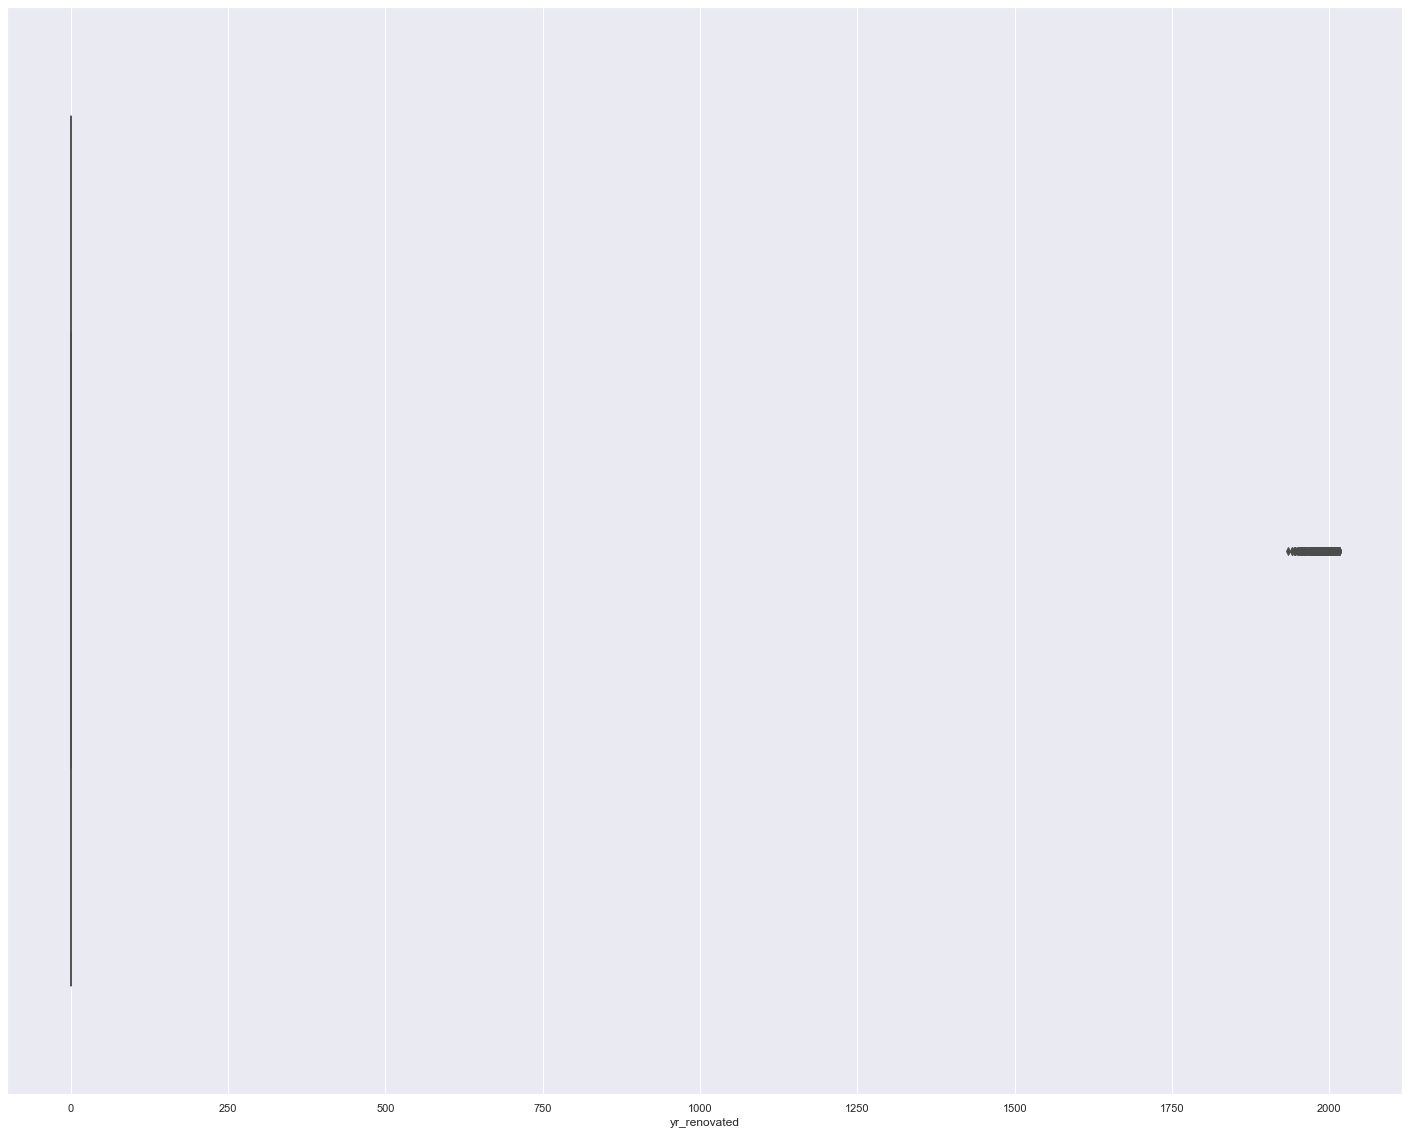

In [1998]:
plt.figure(figsize=(25,20))
sns.boxplot(df['yr_renovated'])
#As seen in the value_counts() function there are many house that are not renoveted according to the dataset
#And the same has been observed in the boxplot as well.

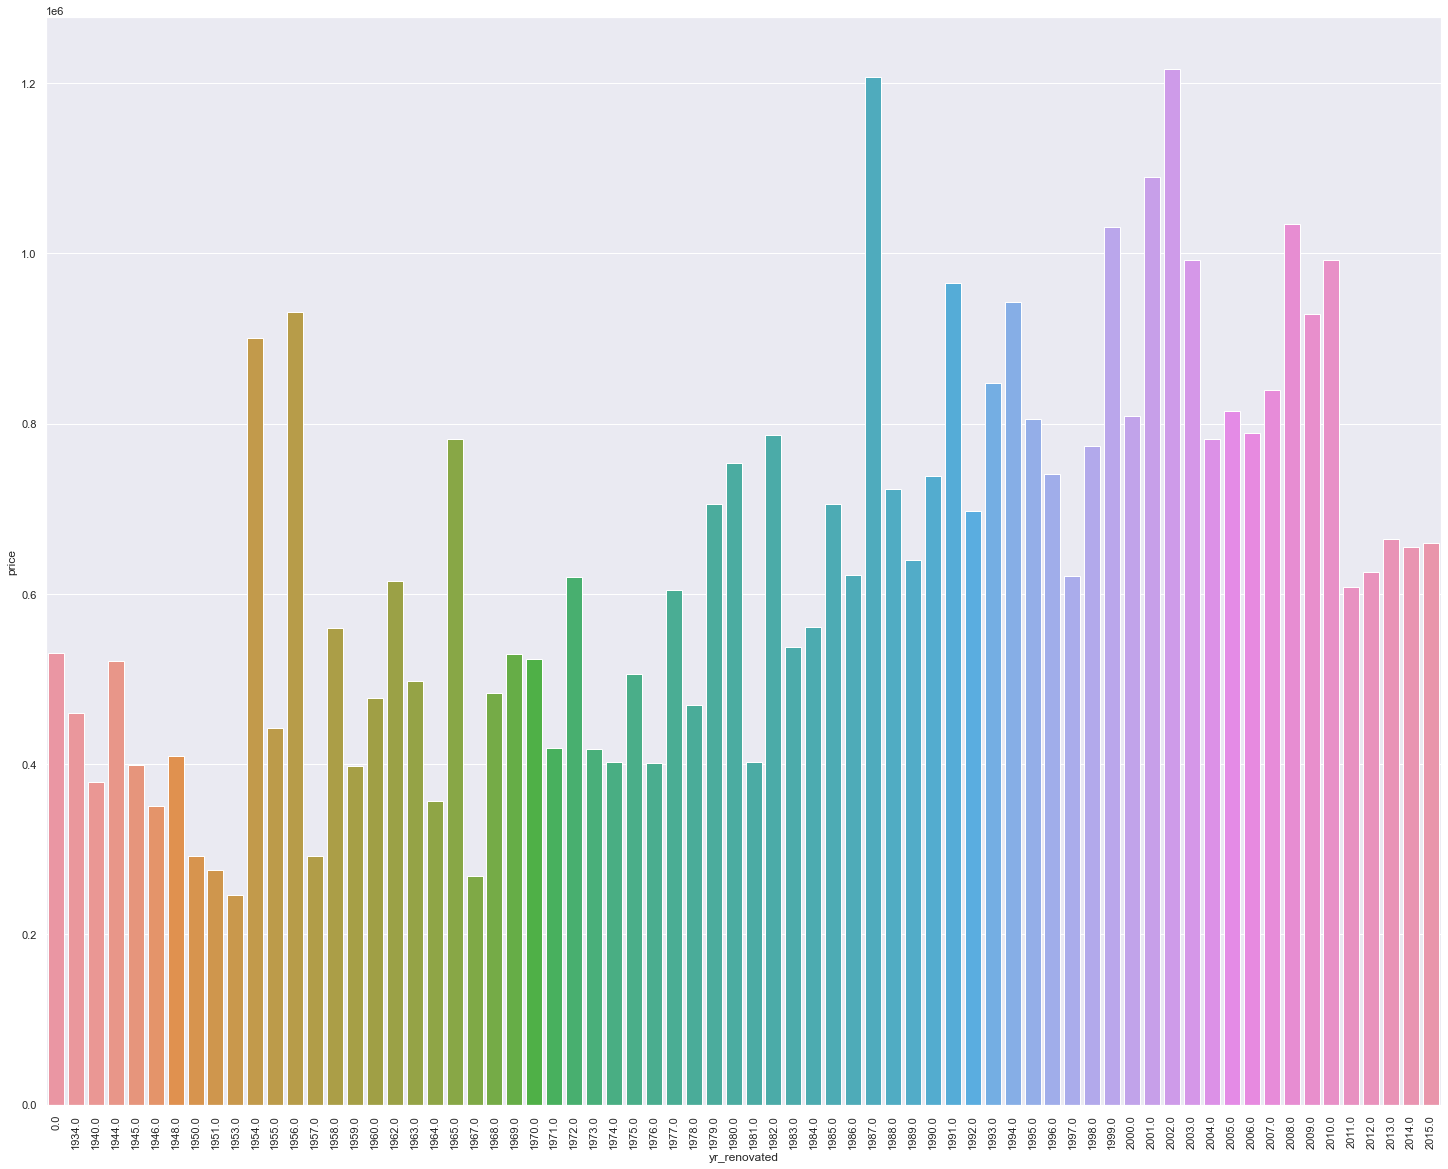

In [1999]:
plt.figure(figsize=(25,20))
sns.barplot(df['yr_renovated'],df['price'],ci=False)
plt.xticks(rotation=90);
#The below barplot suggest that the value of the property dosent depend on wether an house is been renovated or not.

In [2000]:
#zipcode: zip
#The location of property or the price value of the house generally depends on the location.
#Lets plot the univariant and bivariant graphs to check if our predictions are correct
df['zipcode'].value_counts()
#There are nil special characters and no null values present in this column

98103.0    601
98038.0    588
98115.0    581
98052.0    574
98117.0    550
98042.0    545
98034.0    542
98118.0    503
98006.0    498
98023.0    497
98133.0    494
98059.0    466
98058.0    455
98155.0    445
98074.0    441
98033.0    432
98027.0    412
98125.0    408
98056.0    405
98053.0    400
98001.0    361
98075.0    358
98126.0    354
98092.0    348
98144.0    342
98106.0    334
98116.0    329
98029.0    319
98199.0    316
98004.0    315
98065.0    309
98122.0    290
98146.0    288
98028.0    282
98008.0    282
98040.0    281
98198.0    279
98003.0    279
98031.0    274
98072.0    272
98112.0    268
98055.0    267
98168.0    267
98107.0    263
98178.0    262
98136.0    262
98030.0    256
98177.0    254
98166.0    250
98022.0    234
98105.0    228
98045.0    221
98002.0    199
98077.0    198
98011.0    195
98019.0    189
98108.0    186
98119.0    184
98005.0    167
98007.0    140
98188.0    136
98032.0    125
98014.0    122
98070.0    117
98109.0    109
98102.0    105
98010.0   

In [2001]:
df['zipcode'].info()

<class 'pandas.core.series.Series'>
Int64Index: 21541 entries, 0 to 21612
Series name: zipcode
Non-Null Count  Dtype  
--------------  -----  
21541 non-null  float64
dtypes: float64(1)
memory usage: 336.6 KB


In [2002]:
df['zipcode'].unique()

array([98034., 98118., 98002., 98030., 98103., 98006., 98042., 98031.,
       98065., 98109., 98058., 98001., 98105., 98115., 98032., 98033.,
       98199., 98053., 98056., 98102., 98038., 98092., 98003., 98075.,
       98059., 98008., 98011., 98014., 98023., 98116., 98198., 98126.,
       98052., 98108., 98133., 98074., 98077., 98106., 98045., 98146.,
       98155., 98117., 98027., 98040., 98072., 98005., 98055., 98070.,
       98028., 98166., 98019., 98136., 98004., 98125., 98112., 98024.,
       98177., 98122., 98168., 98029., 98007., 98178., 98107., 98010.,
       98188., 98039., 98144., 98022., 98148., 98119.])

In [2003]:
df['zipcode'].isnull().sum()
#As mentioned there are no null values present

0

In [2004]:
#Plot fo the comparision of zipcode and price has to be taken from tableau tool.
#The plot clearly suggest that the price of an house depends on its locality ie according to this dataset is 'zipcode'

In [2005]:
#furnished: Based on the quality of room
#This column shoudl impact the price of an house according to the understanding
#Generally a well furnished house in a prime location will cost more compared to others.
#Lets plot the univariant and Bivariant graphs to understand the same.
df['furnished'].value_counts()

0.0    17278
1.0     4234
Name: furnished, dtype: int64

In [2006]:
df['furnished'].unique()
#Presence of null value is observed

array([ 0.,  1., nan])

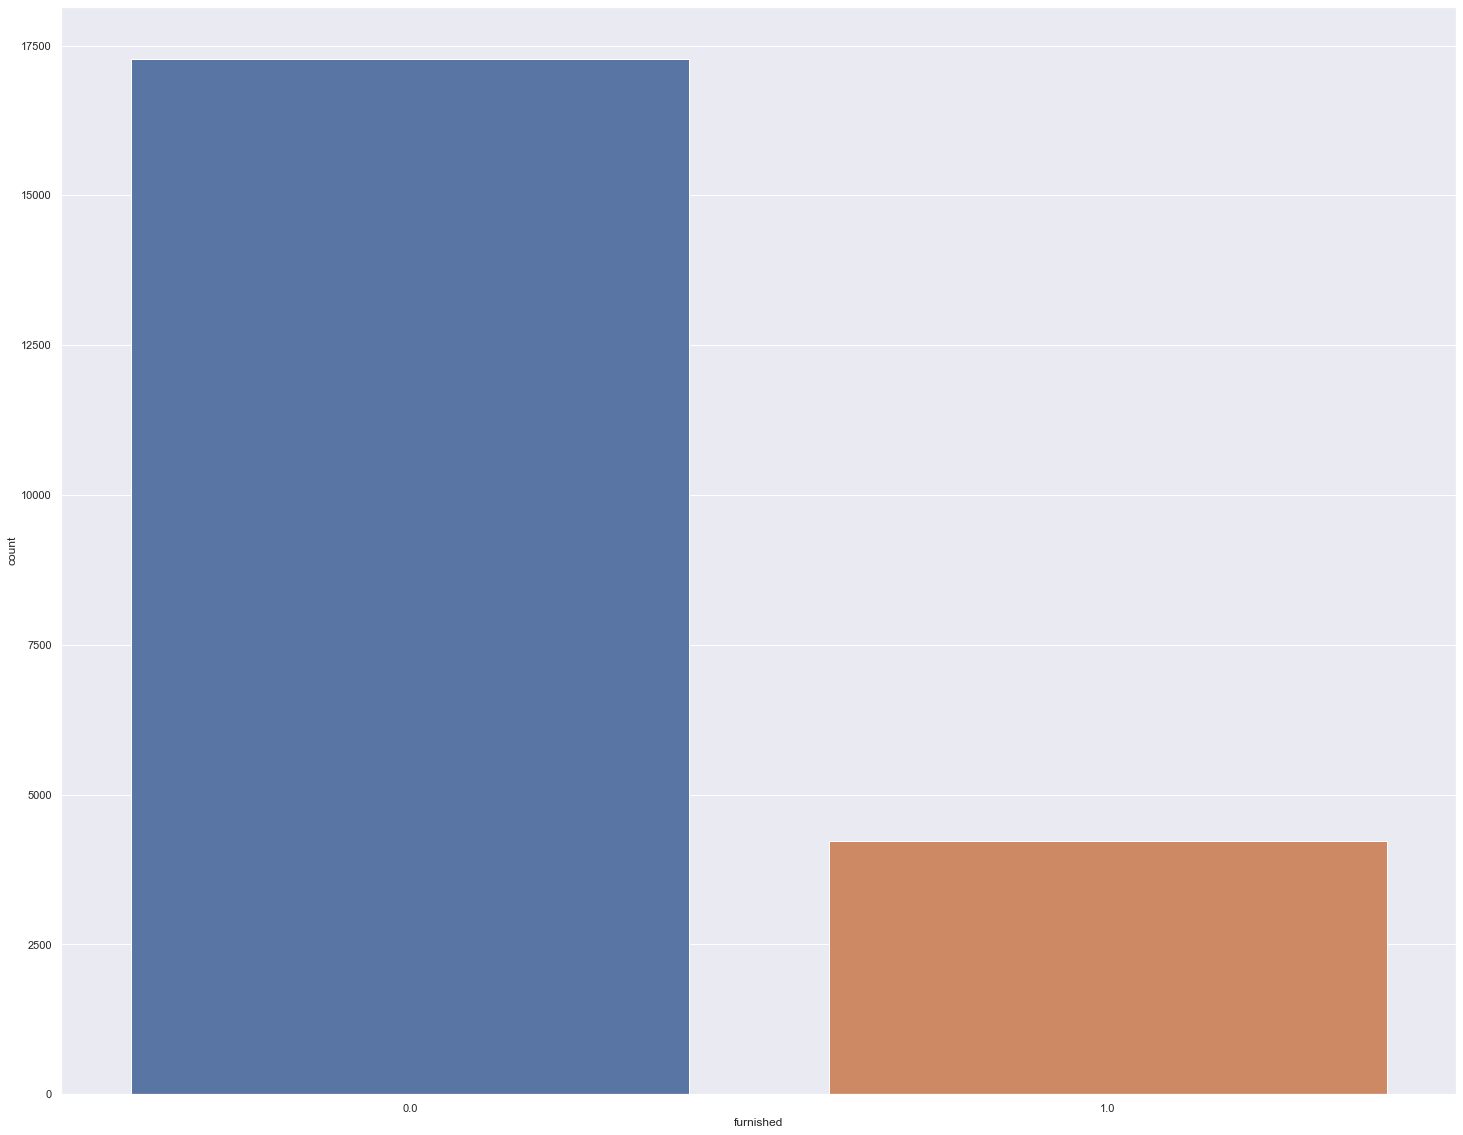

In [2007]:
#Lets check how many furnished and non furnished properties are there in our data set.
plt.figure(figsize=(25,20))
sns.countplot(df['furnished']);
#There are lot many unfurnished properties in the data set 

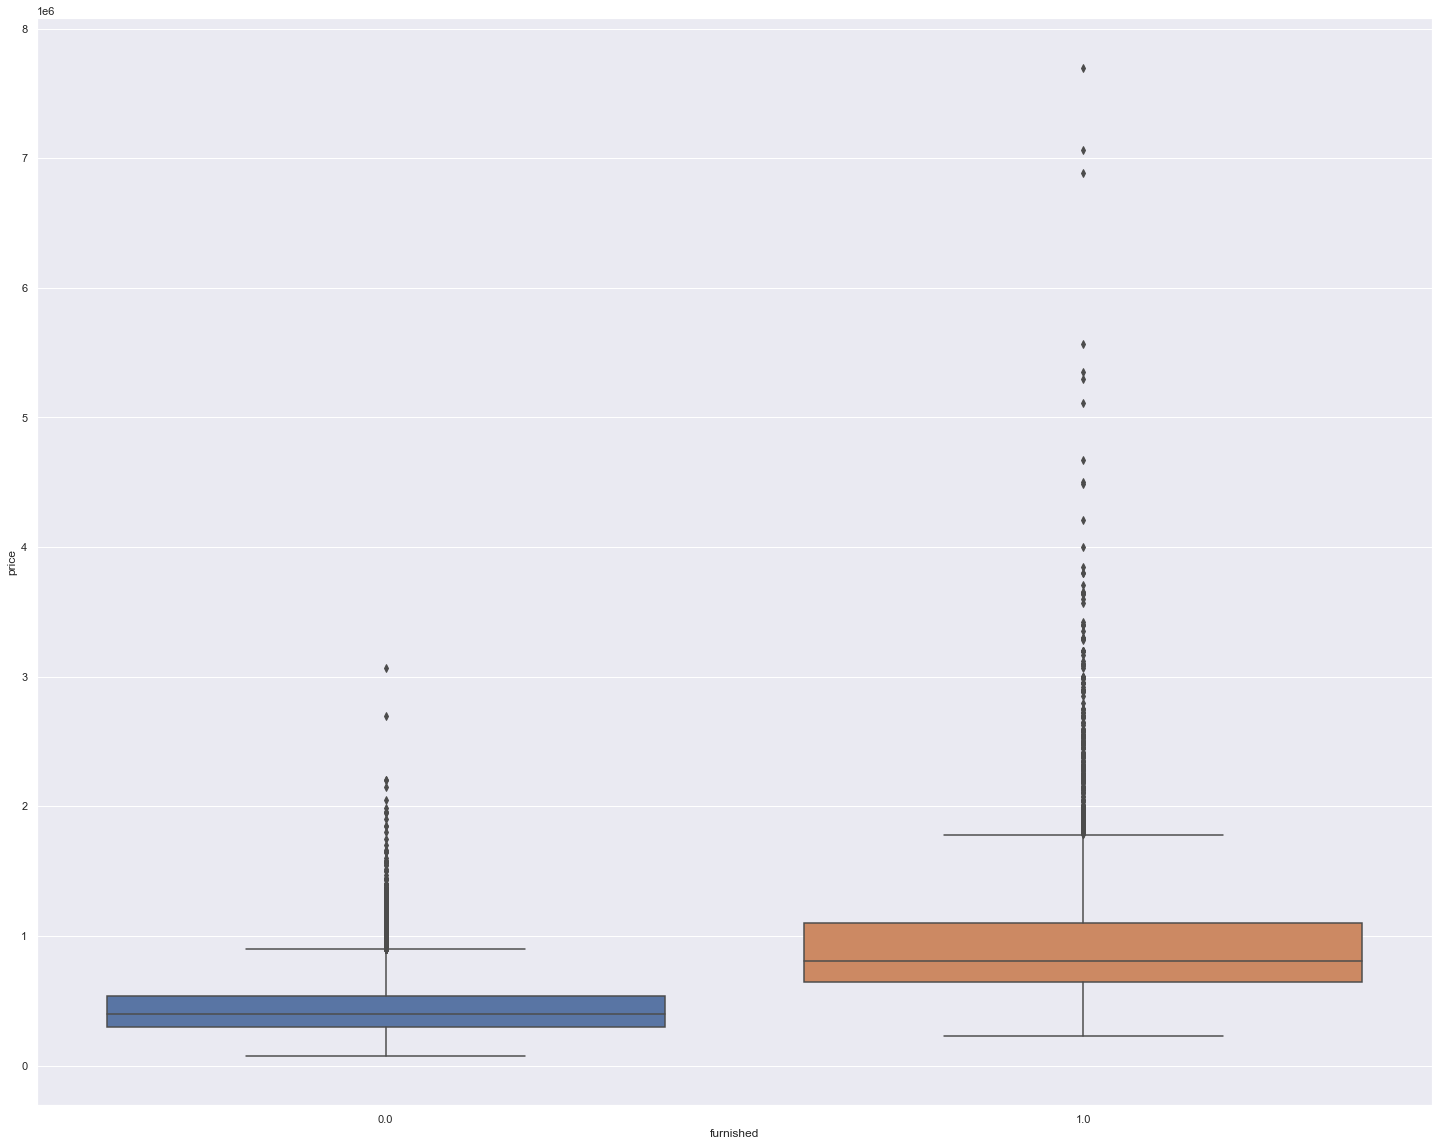

In [2008]:
#comparing the furnished properties and price column to see if the price value changes accordingly
plt.figure(figsize=(25,20))
sns.boxplot(df['furnished'],df['price']);
#Yes definitely the average cost of house which is furnished is much more when compared to unfurnished one

In [2009]:
#total_area: Measure of both living and lot
df['total_area'].info()

<class 'pandas.core.series.Series'>
Int64Index: 21541 entries, 0 to 21612
Series name: total_area
Non-Null Count  Dtype 
--------------  ----- 
21512 non-null  object
dtypes: object(1)
memory usage: 336.6+ KB


In [2010]:
df['total_area'].value_counts()
#Special characters are visble which is to be removed

$            39
9060.0       19
7330.0       19
9820.0       19
8750.0       19
6770.0       19
5940.0       19
6120.0       18
8940.0       18
8510.0       18
8290.0       17
7150.0       17
7820.0       17
7520.0       17
5900.0       17
7910.0       16
6040.0       16
8770.0       16
8410.0       16
8930.0       16
8920.0       16
7210.0       16
7080.0       16
8850.0       15
8650.0       15
8720.0       15
6200.0       15
8340.0       15
7280.0       15
8230.0       15
6160.0       15
6580.0       15
9780.0       15
7830.0       15
9580.0       15
9320.0       15
5720.0       15
9350.0       15
8760.0       15
6090.0       15
9440.0       15
5760.0       15
9010.0       15
7640.0       15
5980.0       15
6060.0       15
8210.0       15
9310.0       14
6820.0       14
7170.0       14
9070.0       14
9900.0       14
9460.0       14
7180.0       14
8420.0       14
6710.0       14
5500.0       14
6660.0       14
9450.0       14
9160.0       14
9660.0       14
9670.0       14
10120.0 

In [2011]:
#Again in this column(total_area) too we could see $ symbol as it contains we very few values it will be removed
df = df.drop(df[df['total_area'] == '$'].index)

In [2012]:
df['total_area'].unique()

array([12490.0, 3771.0, 5455.0, ..., 16111.0, 63597.0, 38122.0],
      dtype=object)

In [2013]:
df['total_area'].isnull().sum()
#There are null values present in this column which needs to be treated

29

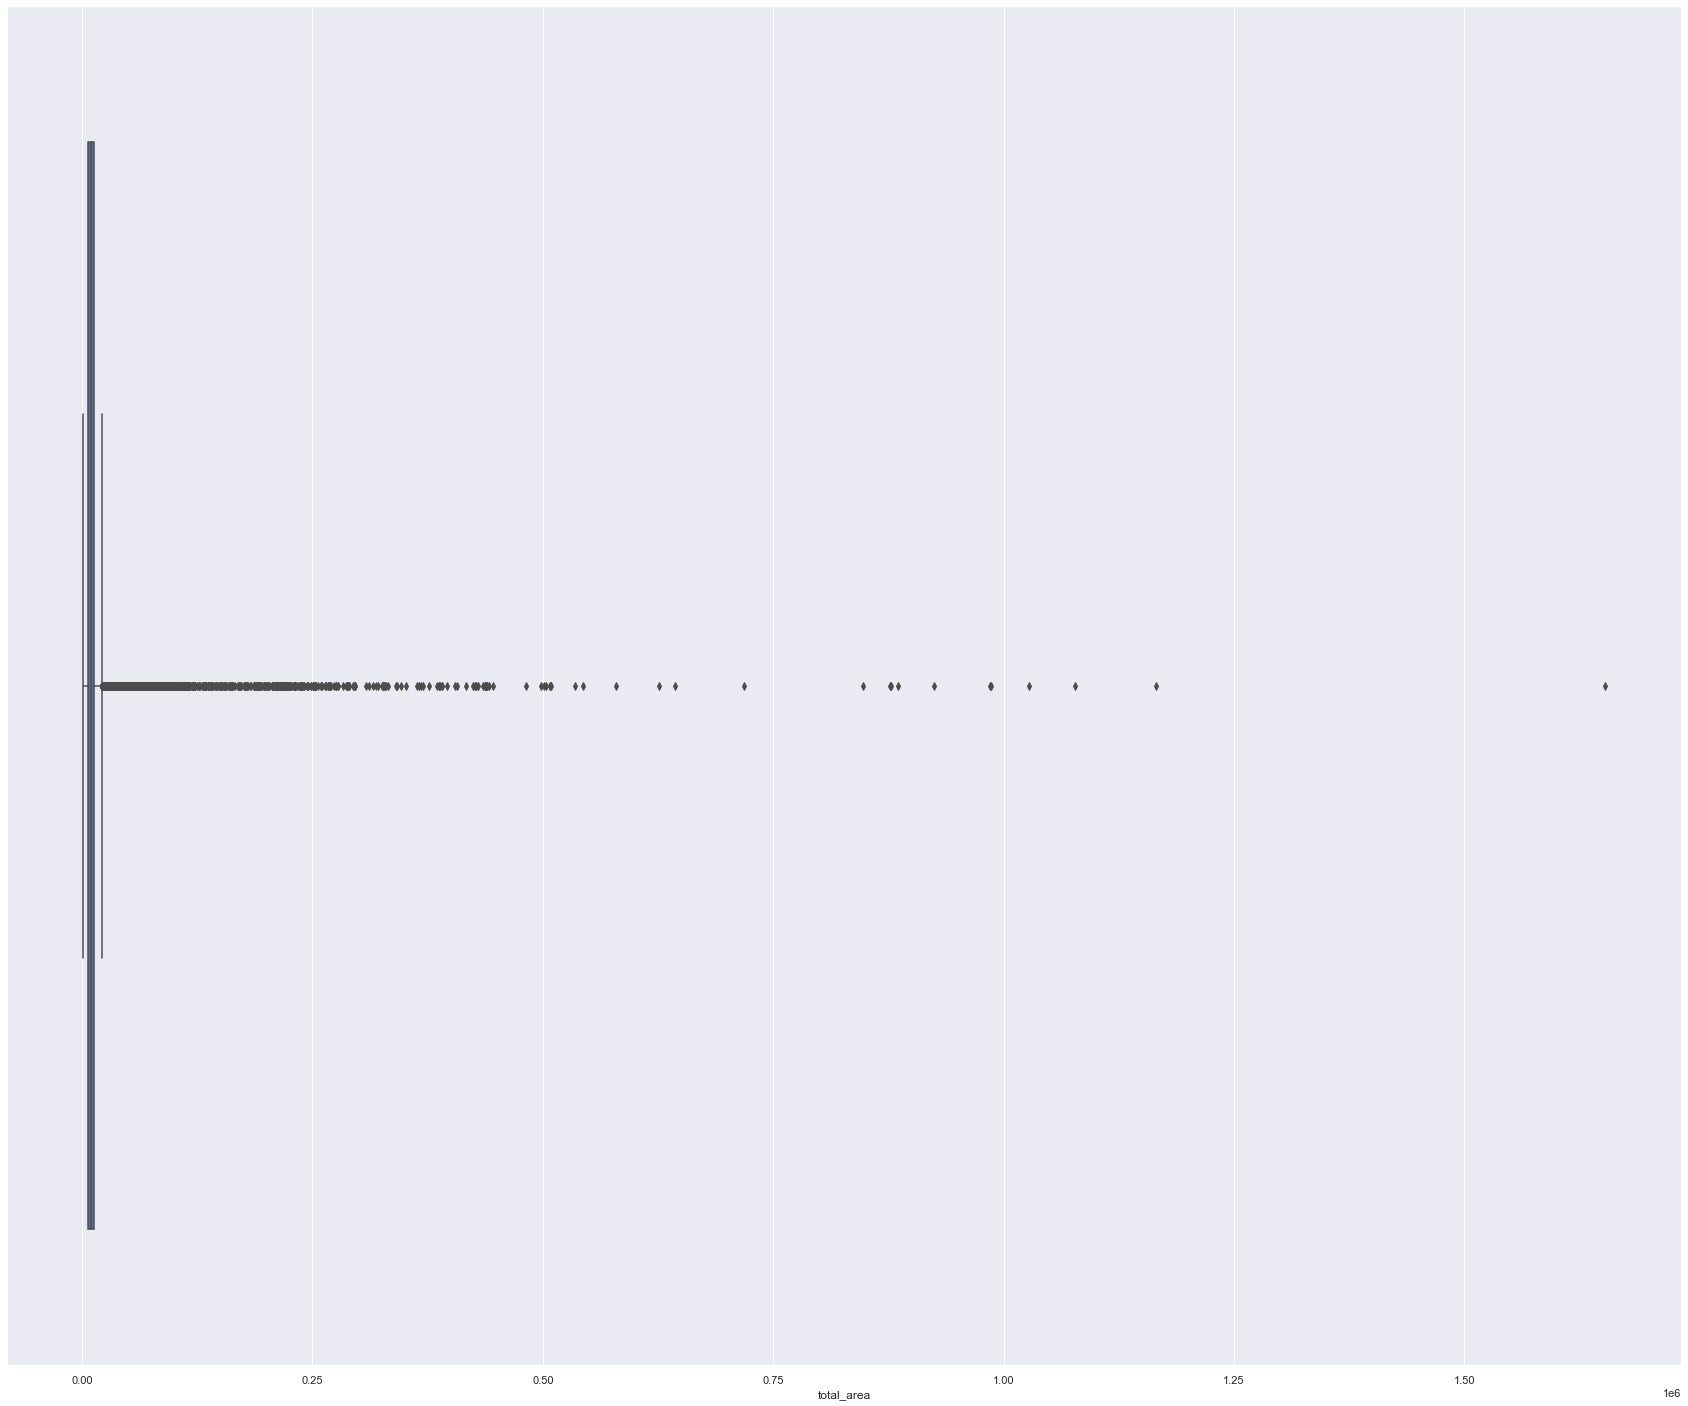

In [2014]:
plt.figure(figsize=(30,25))
sns.boxplot(df['total_area']);
#From the boxplot it is visible that outliers are presnt in this dataset.

In [2015]:
#Comparing the total_area column with the target column price
#Scatter plot for total_are and price has to be taken from tableau.

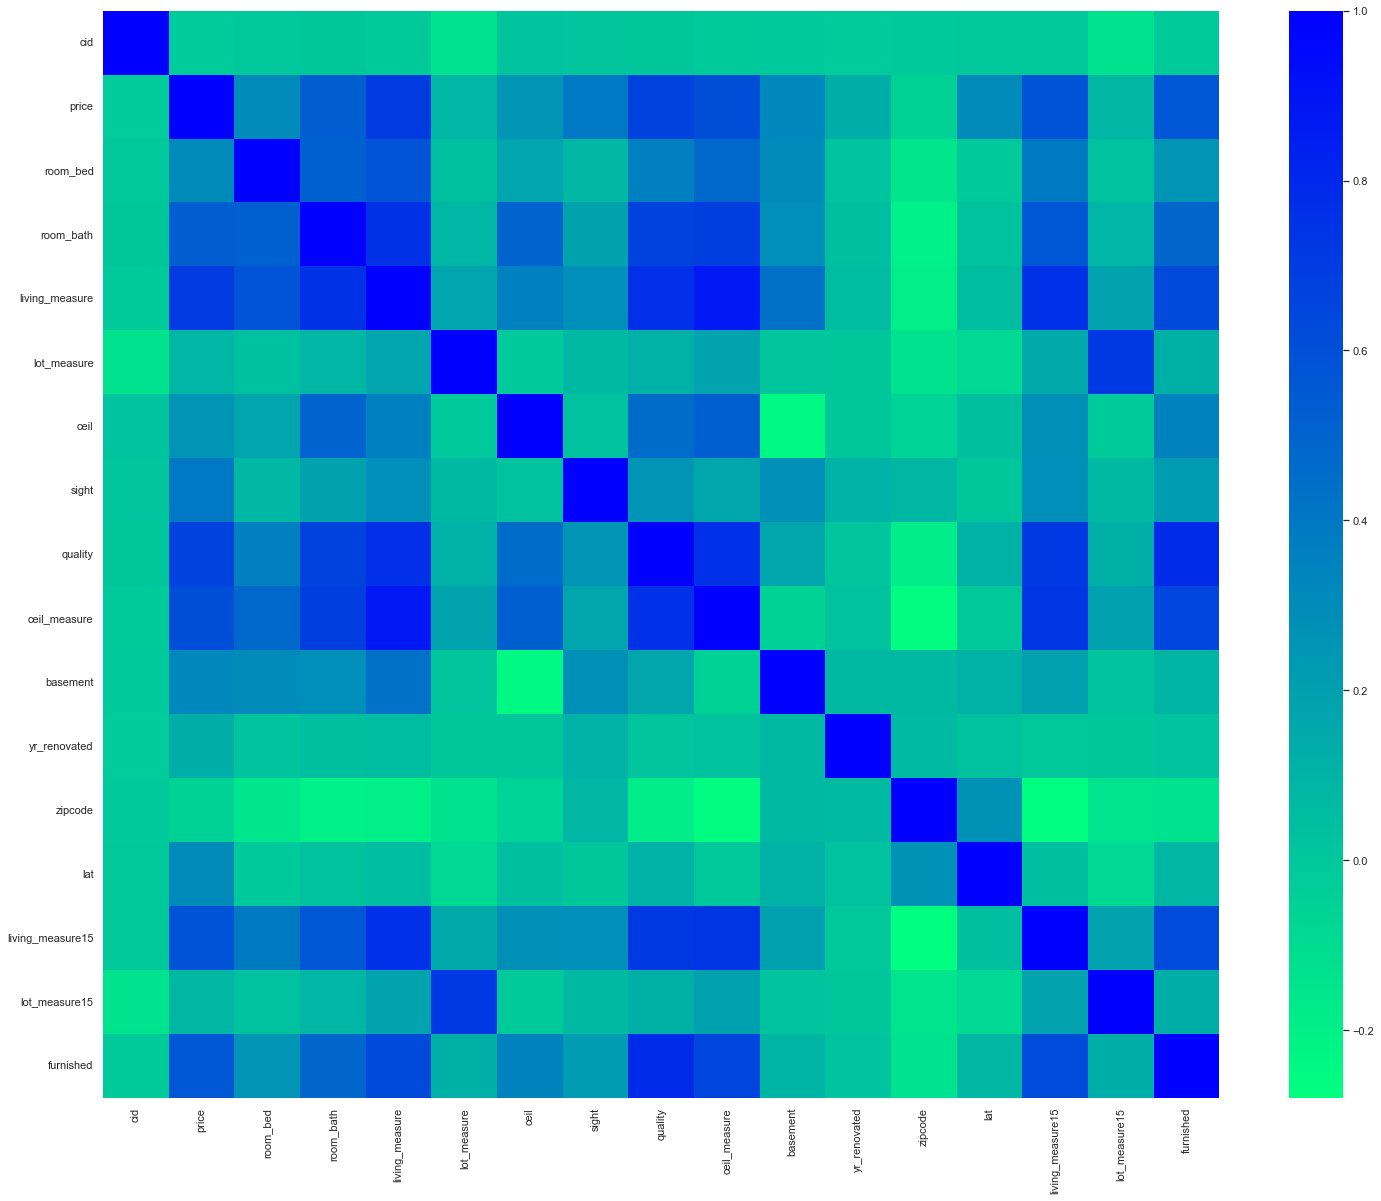

In [2016]:
plt.figure(figsize=(25,20))
sns.heatmap(data=df.corr(),cmap='winter_r');
#Understanding the correlation of other features with the target feature

In [2017]:
df = df.drop(['cid'],axis=1)
#dropping column cid which will be of no use for predictions

In [2018]:
#Lets check for missing values in the data set
df.isnull().sum()
#There are missing values in the data set

dayhours              0
price                 0
room_bed             66
room_bath            66
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    124
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [2019]:
df.size

473044

In [2020]:
df.isnull().sum().sum()

563

In [2021]:
563/473044
#Below is the total missing values in the data set

0.0011901641284954466

In [2022]:
df_X = df.drop('price', axis = 1)
df_Y = df['price']

In [2023]:
#CHecking for the outliers in the column
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [2024]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21502 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayhours          21502 non-null  object 
 1   room_bed          21436 non-null  float64
 2   room_bath         21436 non-null  float64
 3   living_measure    21485 non-null  float64
 4   lot_measure       21460 non-null  float64
 5   ceil              21460 non-null  float64
 6   coast             21501 non-null  object 
 7   sight             21445 non-null  float64
 8   condition         21445 non-null  object 
 9   quality           21501 non-null  float64
 10  ceil_measure      21501 non-null  float64
 11  basement          21501 non-null  float64
 12  yr_built          21501 non-null  object 
 13  yr_renovated      21502 non-null  float64
 14  zipcode           21502 non-null  float64
 15  lat               21502 non-null  float64
 16  long              21502 non-null  object

In [2025]:
df_Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 21502 entries, 0 to 21612
Series name: price
Non-Null Count  Dtype
--------------  -----
21502 non-null  int64
dtypes: int64(1)
memory usage: 336.0 KB


In [2026]:
((df_X > UL) | (df_X < LL)).sum()
#listed below are column wise outlier

basement             490
ceil                   0
ceil_measure         610
coast                  0
condition              0
dayhours               0
furnished           4229
lat                    2
living_measure       570
living_measure15     540
long                   0
lot_measure         2407
lot_measure15       2180
quality             1904
room_bath            566
room_bed             540
sight               2109
total_area             0
yr_built               0
yr_renovated         907
zipcode                0
dtype: int64

In [2027]:
((df_X > UL) | (df_X < LL)).sum().sum()
#Total outliers present in the data set which is actually more when compared to that of null values.

17054

In [2028]:
df_X[((df_X > UL) | (df_X < LL))]= np.nan
#Converting outliers to missing values

In [2029]:
df_X.isnull().sum()
#After adding the missing values and outliers for each column

dayhours               0
room_bed             606
room_bath            632
living_measure       587
lot_measure         2449
ceil                  42
coast                  1
sight               2166
condition             57
quality             1905
ceil_measure         611
basement             491
yr_built               1
yr_renovated         907
zipcode                0
lat                    2
long                   0
living_measure15     664
lot_measure15       2209
furnished           4258
total_area            29
dtype: int64

In [2030]:
df_X.isnull().sum().sum()#Total missing values and outliers

17617

In [2031]:
17617/473044
#Approximately 3% of the data to be modified

0.03724177877744988

In [2032]:
df_sub1 = pd.concat([df_X, df_Y], axis =1 )

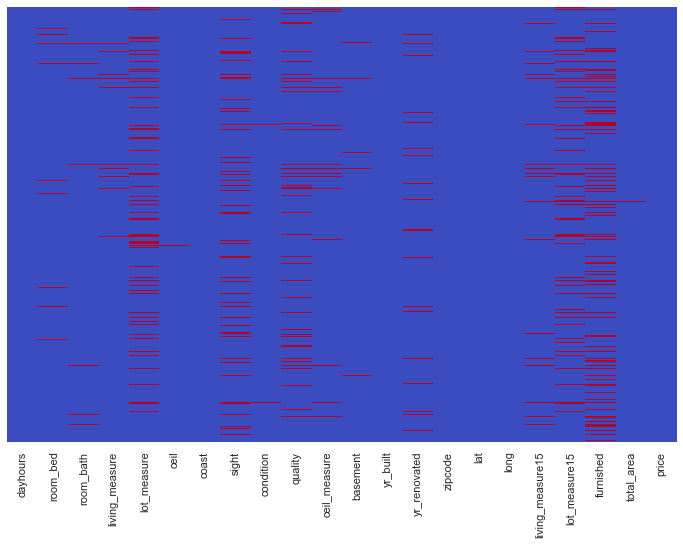

In [2033]:
#Visualy inspecting the missing values in the data set in column wise
plt.figure(figsize = (12,8))
sns.heatmap(df_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [2034]:
#Checking for total missing values in each row
df_sub1.isnull().sum(axis = 1)

0         0
1         0
2         1
3         0
4         0
5         0
6         0
7         3
8         1
9         0
10        0
11        0
12        3
13        0
14        0
15        0
16        0
17        0
18        2
19        1
20        1
21        1
22        0
23        0
24        0
25        3
26        0
27        0
28        2
29        1
30        0
31        0
32        0
33        2
34        0
35        0
36        0
37        3
38        0
39        0
40        0
41        1
42        0
43        0
44        0
45        0
46        1
47        1
48        0
49        0
50        0
51        0
52        0
53        0
54        0
55        0
56        0
57        1
58        0
59        0
60        0
61        0
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        2
75        0
76        0
77        0
78        0
79        1
80        2
81        0
82        1
83  

In [2035]:
#Filtering the data which is 90% or more complete at the row level
df_sub1_temp = df_sub1[df_sub1.isnull().sum(axis = 1) <= 2]
#This filter gives us the columns which has less than 10% of the missing values 
#So which means 90% or more information will be available in the dataset

In [2036]:
df_sub1_temp.shape
#So with our filter approach we have dropped considerable amount of data from the dataset which is not fit for building a model.
#So in our case we have 19153 rows and 22 columns which originally was 21612 rows and 22 columns

(19153, 22)

In [2037]:
df_sub1_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19153 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayhours          19153 non-null  object 
 1   room_bed          18781 non-null  float64
 2   room_bath         19044 non-null  float64
 3   living_measure    19145 non-null  float64
 4   lot_measure       17992 non-null  float64
 5   ceil              19129 non-null  float64
 6   coast             19153 non-null  object 
 7   sight             17922 non-null  float64
 8   condition         19152 non-null  object 
 9   quality           18527 non-null  float64
 10  ceil_measure      19122 non-null  float64
 11  basement          19008 non-null  float64
 12  yr_built          19153 non-null  object 
 13  yr_renovated      18516 non-null  float64
 14  zipcode           19153 non-null  float64
 15  lat               19152 non-null  float64
 16  long              19153 non-null  object

In [2038]:
df_sub1_temp.isnull().sum().sort_values(ascending = False)/df_sub1_temp.index.size
#There are no columns which has the missing values more than 30%

furnished           0.122435
sight               0.064272
lot_measure         0.060617
lot_measure15       0.049705
yr_renovated        0.033258
quality             0.032684
room_bed            0.019423
basement            0.007571
room_bath           0.005691
living_measure15    0.001827
ceil_measure        0.001619
ceil                0.001253
living_measure      0.000418
condition           0.000052
lat                 0.000052
total_area          0.000000
dayhours            0.000000
long                0.000000
zipcode             0.000000
yr_built            0.000000
coast               0.000000
price               0.000000
dtype: float64

In [2039]:
df_sub1_temp.isnull().sum()
#These are set of missing values currently available which will be treated using KNNImputer method.

dayhours               0
room_bed             372
room_bath            109
living_measure         8
lot_measure         1161
ceil                  24
coast                  0
sight               1231
condition              1
quality              626
ceil_measure          31
basement             145
yr_built               0
yr_renovated         637
zipcode                0
lat                    1
long                   0
living_measure15      35
lot_measure15        952
furnished           2345
total_area             0
price                  0
dtype: int64

In [2040]:
#Segirigate the predictor and response
predictors = df_sub1_temp.drop('price', axis = 1)
response = df_sub1_temp['price']

In [2041]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19153 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayhours          19153 non-null  object 
 1   room_bed          18781 non-null  float64
 2   room_bath         19044 non-null  float64
 3   living_measure    19145 non-null  float64
 4   lot_measure       17992 non-null  float64
 5   ceil              19129 non-null  float64
 6   coast             19153 non-null  object 
 7   sight             17922 non-null  float64
 8   condition         19152 non-null  object 
 9   quality           18527 non-null  float64
 10  ceil_measure      19122 non-null  float64
 11  basement          19008 non-null  float64
 12  yr_built          19153 non-null  object 
 13  yr_renovated      18516 non-null  float64
 14  zipcode           19153 non-null  float64
 15  lat               19152 non-null  float64
 16  long              19153 non-null  object

In [2042]:
response.info()

<class 'pandas.core.series.Series'>
Int64Index: 19153 entries, 0 to 21612
Series name: price
Non-Null Count  Dtype
--------------  -----
19153 non-null  int64
dtypes: int64(1)
memory usage: 299.3 KB


In [2043]:
predictors = predictors.drop(predictors[predictors['long'] == '$'].index)
#To remove special character from long column

In [2044]:
predictors['dayhours'] = predictors['dayhours'].replace('T','',regex=True)

In [2045]:
#Scale the predictor
#Scaling has been done here to treat the missing values in the data set
from sklearn.preprocessing import StandardScaler #Scale train and test separately
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [2046]:
df_sub2 = pd.concat([scaled_predictors, response], axis = 1)

In [2047]:
df_sub2.columns

Index(['dayhours', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'price'],
      dtype='object')

In [2048]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(df_sub2, test_size = 0.3)

In [2049]:
from sklearn.impute import KNNImputer #MICE FancyImpute

In [2050]:
imputer = KNNImputer(n_neighbors=5)
#Note the hyper parameter n_neighbour will be changed from 5 to some other value if our model dosent perform well enough.

In [2051]:
df_imputed_train = pd.DataFrame(imputer.fit_transform(Train), columns = Train.columns)
df_imputed_test = pd.DataFrame(imputer.transform(Test), columns = Test.columns)
# Test is an unseen data so dont do fit on test data set

In [2052]:
print(df_imputed_train.isnull().sum().sum())
print(df_imputed_test.isnull().sum().sum())
#All our outliers and missing values are treated here.

0
0


4. Business insights from EDA

a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business

In [2053]:
df_imputed_train.shape

(14930, 22)

In [2054]:
df_imputed_test.shape

(6399, 22)

Yes the data set is now imbalanced.
Generally if the data set is imbalanced we can go for SMOTE technique.
But in this our case we are dealing with regeression problem so wether the data set is imbalanced or not dosent matter.

b) Any business insights using clustering (if applicable)

In [2055]:
df_cluster = pd.concat([df_imputed_train,df_imputed_test])

In [2056]:
df_cluster = df_cluster.drop(['dayhours'],axis=1)

In [2057]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21329 entries, 0 to 6398
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   room_bed          21329 non-null  float64
 1   room_bath         21329 non-null  float64
 2   living_measure    21329 non-null  float64
 3   lot_measure       21329 non-null  float64
 4   ceil              21329 non-null  float64
 5   coast             21329 non-null  float64
 6   sight             21329 non-null  float64
 7   condition         21329 non-null  float64
 8   quality           21329 non-null  float64
 9   ceil_measure      21329 non-null  float64
 10  basement          21329 non-null  float64
 11  yr_built          21329 non-null  float64
 12  yr_renovated      21329 non-null  float64
 13  zipcode           21329 non-null  float64
 14  lat               21329 non-null  float64
 15  long              21329 non-null  float64
 16  living_measure15  21329 non-null  float64

In [2058]:
#Performing zscore tehnique for scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_data = X.fit_transform(df_cluster)
scaled_data

array([[ 0.93849653,  0.38227886,  0.92025344, ...,  0.        ,
        -0.24003136,  0.90340158],
       [ 2.26674214,  0.77608632,  1.99714897, ...,  0.        ,
         0.04318695, -0.30559747],
       [ 0.93849653,  1.16989378,  0.78374555, ...,  0.        ,
        -0.06203542, -1.10409498],
       ...,
       [ 0.93849653,  0.77608632, -0.23247981, ...,  0.        ,
        -0.17911107,  1.24098508],
       [ 0.93849653,  0.77608632,  0.28321664, ...,  0.        ,
        -0.13248559, -0.22637788],
       [-0.12409995, -0.09029009, -0.478194  , ...,  0.        ,
        -0.13851067, -0.88354042]])

Perform clustering and do the following:
Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [2059]:
from scipy.cluster.hierarchy import dendrogram,linkage
warlink = linkage(scaled_data,method='ward')

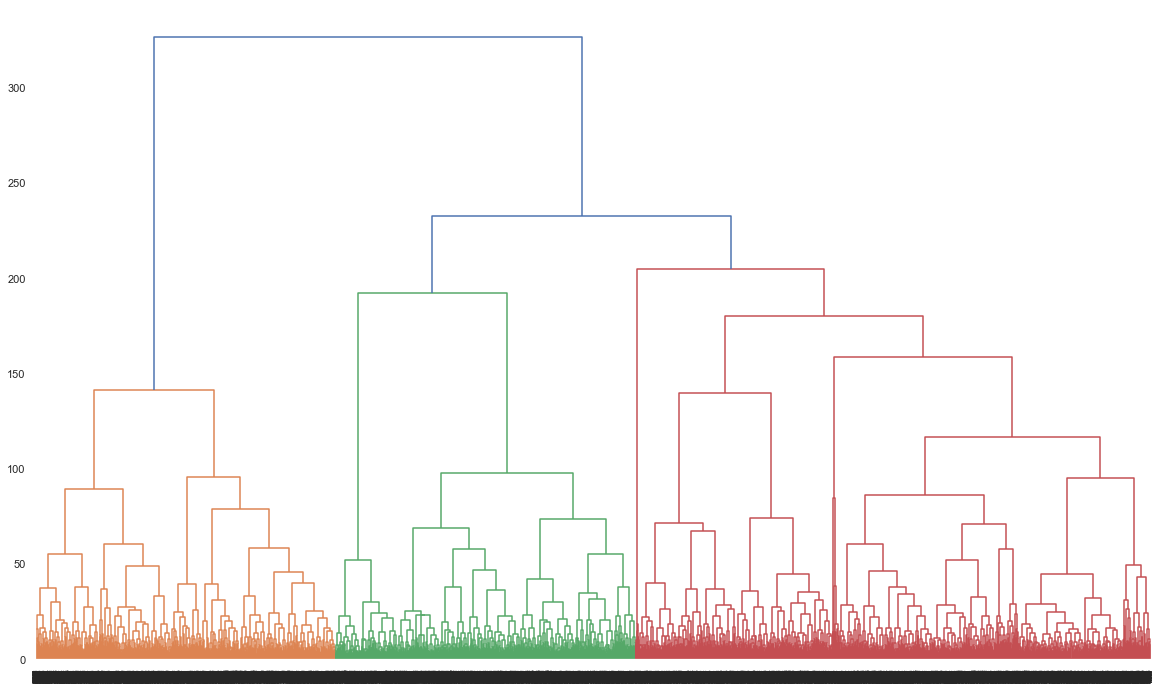

In [2060]:
plt.figure(figsize=(20,12))
dent = dendrogram(warlink)
#Performing Dendogram for large set of data set is usually not ideal as it takes more time to execute

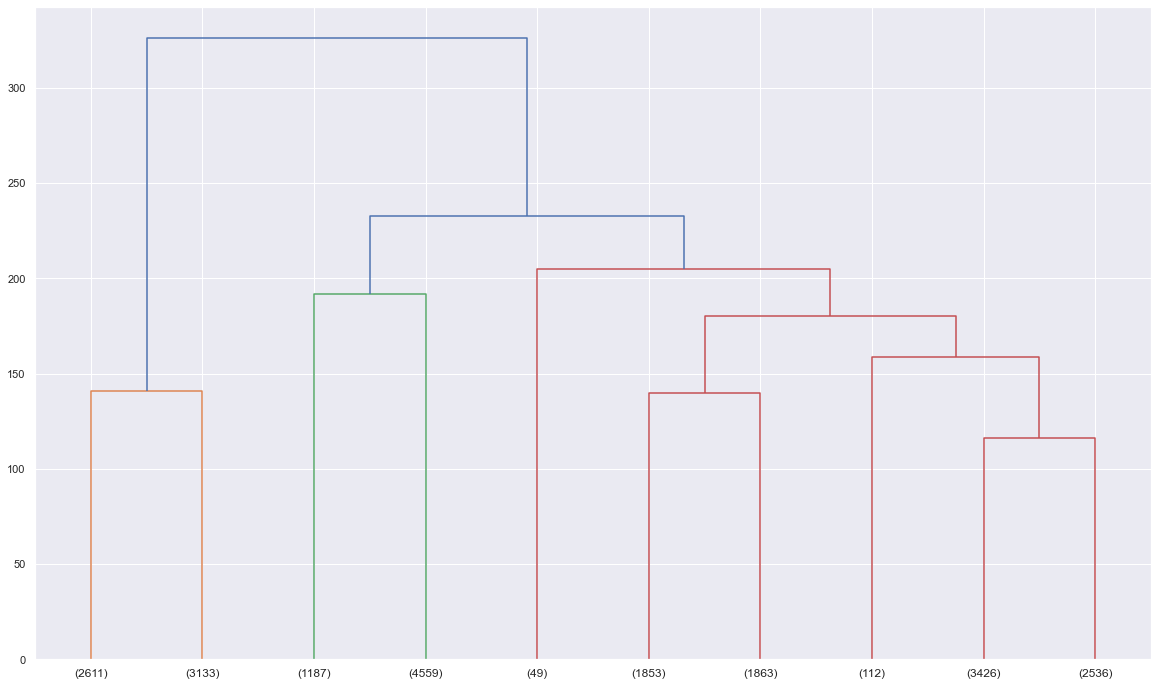

In [2061]:
plt.figure(figsize=(20,12))
dent = dendrogram(warlink,truncate_mode='lastp',p=10)
#plt.ticklabel_format(useOffset = False)

Every horizontal line here is a merge.
The total number of cluster in orange is 5573
The total number of cluster in green is 9747
The total number of cluster in red is 6009

In [2062]:
49+2999+2844+117

6009

Two methods to derive the clusters using linkage method

In [2063]:
from scipy.cluster.hierarchy import fcluster
cluster = fcluster(warlink,220,criterion='distance')
cluster

array([1, 1, 1, ..., 1, 3, 3], dtype=int32)

In [2064]:
from scipy.cluster.hierarchy import fcluster
cluster = fcluster(warlink,3,criterion='maxclust')
cluster

array([1, 1, 1, ..., 1, 3, 3], dtype=int32)

In [2065]:
df_cluster['cluster'] = cluster
#Attaching the column cluster to the dataframe

In [2066]:
df_cluster.head()

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,price,cluster
0,0.896338,0.372216,0.880593,-0.889015,0.992349,-0.050681,0.0,-0.639204,0.712765,0.313399,1.111690,1.428968,0.0,-1.135946,1.259450,1.862513,0.372839,-0.960580,0.0,-0.231391,676000.0,1
1,2.167381,0.749270,1.912314,0.958617,0.992349,-0.050681,0.0,-0.639204,0.712765,2.464744,-0.672152,1.225814,0.0,-1.135946,1.204262,1.935527,1.865755,0.637187,0.0,0.039887,407400.0,1
2,0.896338,1.126323,0.749811,0.425022,0.064959,-0.050681,0.0,0.887749,-0.511917,1.217587,-0.672152,-1.889210,0.0,-1.452308,-1.776628,-0.050447,-1.447790,-0.732418,0.0,-0.060899,230000.0,1
3,-0.374705,0.749270,0.066841,0.768780,0.992349,-0.050681,0.0,-0.639204,0.712765,0.484883,-0.672152,0.616353,0.0,-0.112424,0.555619,1.439033,-0.009493,0.189493,0.0,-0.033138,337000.0,1
4,0.896338,0.749270,1.181391,-0.768443,0.992349,-0.050681,0.0,-0.639204,0.712765,1.680594,-0.672152,1.191955,0.0,-1.470917,-1.587410,-0.320598,1.246741,-0.720595,0.0,-0.207628,986000.0,1


In [2067]:
df_cluster.to_csv('/Users/happyfamily/Desktop/Capstone/hc.csv')

So far this data set we have created has 3 different type of clusters.
The clusters are being segregated w.r.t price of the house based on the different set of columns from the dataset.
Cluster 1 is in the midrange or budget priced houses
Cluster 2 has the list of high price houses
Cluster 3 is of house with low budget

c) Any other business insights

As per the understanding of the dataset the probelm statement that we are dealing with is the regression type of problem.
The reason why it is any regression problem is because we need to predict the price of an property with the available columns.
Seems like from the heat map we were able to identify that strong correlation is present for some of the variable with the target variable price
Null values and outliers present in the data set needs to treated and it is done by KNNImputer.
The reason for choosing the KNNImputer method is because the dataset that we are dealing with relates to money so we cannot predict or append the price of property which has larger square feet or living area or locality of the property and a well furnished property with relative low dimensions and quality of an house.
Hence the concept of KNN will help us predict the house of missing values with K-nearest neighbours.
Since it is an regression based problem unbalanced dataset shouldnt be an issue.
Hiererchal clustering is performed with the help linkage methods - Distance and Maxcluster which help us to segregate the properties into three different clusters.
So with this the main agenda is build a model in the train set and that it help to predicts the accurate pricing of an property in the test dataset